In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import folium
import geopandas as gp
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-countries/world-countries.json
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/hackathon_file_readme.txt
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/OpenTable/restaurant-performance.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/self_care_catalysts/self_care_catalysts/Kaggle App data dictionary.xlsx
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/self_care_catalysts/self_care_catalysts/covid-19-symptom-tracker.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/self_care_catalysts/self_care_catalysts/Kaggle Survey data dictionary-SPSS syntax to apply labels to questions and response choices-May 15.docx
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/self_care_catalysts/self_care_catalysts/survey-data.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/ontario_government/confirmed-positive-cases-of-covid-19-in-ontario.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/ontario_government/status-of-covid-19-cases-in-ontario.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/public_health_england/covid-19-daily-confirmed

Collecting World Wise Data 

In [2]:
Continent_deaths=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/worldometer/worldometer-confirmed-cases-and-deaths-by-country-territory-or-conveyance.csv')
Continent_deaths=Continent_deaths.drop(Continent_deaths.iloc[:,0:1],axis=1)
Continent_deaths=Continent_deaths.drop(Continent_deaths.iloc[:,8:],axis=1)

Continent_deaths=Continent_deaths[Continent_deaths['country']!='Total:']
Continent_deaths

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical_cases
0,North America,1769274,"+6,473",108333.0,+516,468480.0,1192461,18977.0
1,Europe,1846024,"+15,357",166437.0,+639,823106.0,856481,10891.0
2,South America,521321,"+1,233",26779.0,+154,193751.0,300791,10583.0
3,Asia,880014,"+16,556",26066.0,+213,509509.0,344439,4936.0
4,Africa,98920,"+1,930",3052.0,+42,39617.0,56251,288.0
...,...,...,...,...,...,...,...,...
218,Western Sahara,6,NaN,NaN,NaN,6.0,0,NaN
219,Anguilla,3,NaN,NaN,NaN,3.0,0,NaN
220,Lesotho,1,NaN,NaN,NaN,NaN,1,NaN
221,Saint Pierre Miquelon,1,NaN,NaN,NaN,1.0,0,NaN


Seperating Dataframes into two Dataframes 

Continent Dataframe

In [3]:
Continent=Continent_deaths.iloc[0:8].dropna()
Continent

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical_cases
0,North America,1769274,"+6,473",108333.0,+516,468480.0,1192461,18977.0
1,Europe,1846024,"+15,357",166437.0,+639,823106.0,856481,10891.0
2,South America,521321,"+1,233",26779.0,+154,193751.0,300791,10583.0
3,Asia,880014,"+16,556",26066.0,+213,509509.0,344439,4936.0
4,Africa,98920,"+1,930",3052.0,+42,39617.0,56251,288.0
7,World,5124962,"+41,551",330803.0,"+1,564",2043139.0,2751020,45689.0


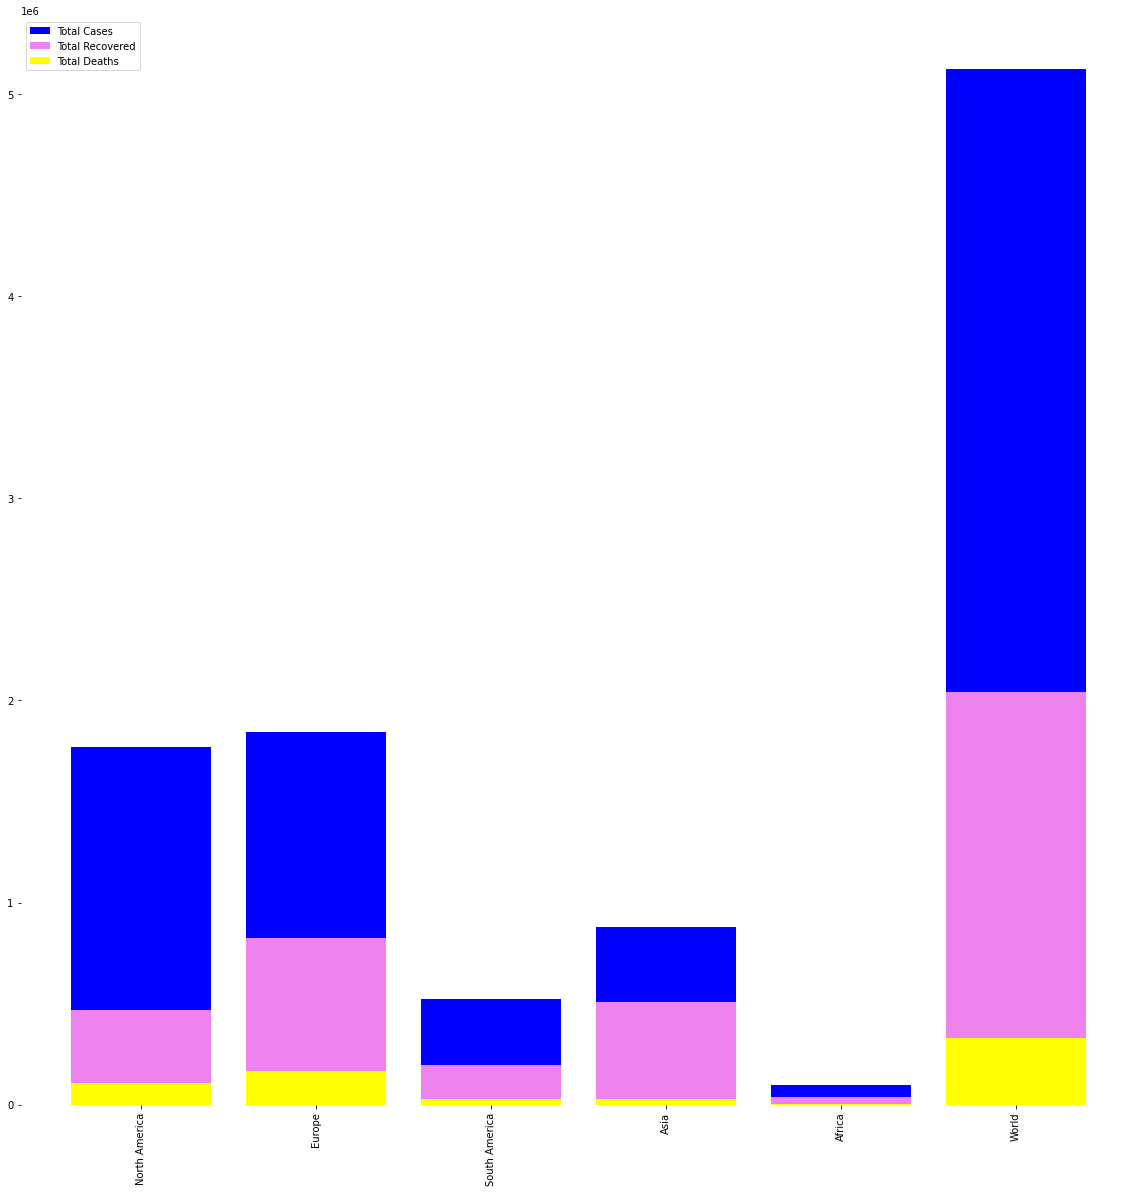

In [4]:
continent=Continent['country']

total_cases12=Continent['total_cases']
total_recovered12=Continent['total_recovered']
total_deaths12=Continent['total_deaths']
plt.figure(figsize=(20,20))
plt.bar(continent,total_cases12,linewidth=2,color='blue')
plt.bar(continent,total_recovered12,linewidth=2,color='violet')
plt.bar(continent,total_deaths12,linewidth=2,color='yellow')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.box(on=None)

Country Dataframe

Replace nan values with 0

In [5]:
Country=Continent_deaths.iloc[8:]
Country.fillna(0,inplace=True)
Country

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical_cases
8,USA,1596526,"+3,803",95021.0,+85,370973.0,1130532,17815.0
9,Russia,317554,"+8,849",3099.0,+127,92681.0,221774,2300.0
10,Brazil,294152,+795,19038.0,+144,116683.0,158431,8318.0
11,Spain,279524,0,27888.0,0,196958.0,54678,1152.0
12,UK,250908,"+2,615",36042.0,+338,0.0,0,1559.0
...,...,...,...,...,...,...,...,...
218,Western Sahara,6,0,0.0,0,6.0,0,0.0
219,Anguilla,3,0,0.0,0,3.0,0,0.0
220,Lesotho,1,0,0.0,0,0.0,1,0.0
221,Saint Pierre Miquelon,1,0,0.0,0,1.0,0,0.0


Normalizing the Data given in the Table

In [6]:
Country['total_cases']=Country['total_cases']-Country['total_cases'].mean()/Country['total_cases'].std()
Country['total_deaths']=Country['total_deaths']-Country['total_deaths'].mean()/Country['total_deaths'].std()
Country['total_recovered']=Country['total_recovered']-Country['total_recovered'].mean()/Country['total_recovered'].std()
Country['active_cases']=Country['active_cases']-Country['active_cases'].mean()/Country['active_cases'].std()
Country['serious_critical_cases']=Country['serious_critical_cases']-Country['serious_critical_cases'].mean()/Country['serious_critical_cases'].std()
Country

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical_cases
8,USA,1.596526e+06,"+3,803",95020.80424,+85,370972.731332,1.130532e+06,17814.844813
9,Russia,3.175538e+05,"+8,849",3098.80424,+127,92680.731332,2.217739e+05,2299.844813
10,Brazil,2.941518e+05,+795,19037.80424,+144,116682.731332,1.584309e+05,8317.844813
11,Spain,2.795238e+05,0,27887.80424,0,196957.731332,5.467785e+04,1151.844813
12,UK,2.509078e+05,"+2,615",36041.80424,+338,-0.268668,-1.457970e-01,1558.844813
...,...,...,...,...,...,...,...,...
218,Western Sahara,5.798059e+00,0,-0.19576,0,5.731332,-1.457970e-01,-0.155187
219,Anguilla,2.798059e+00,0,-0.19576,0,2.731332,-1.457970e-01,-0.155187
220,Lesotho,7.980590e-01,0,-0.19576,0,-0.268668,8.542030e-01,-0.155187
221,Saint Pierre Miquelon,7.980590e-01,0,-0.19576,0,0.731332,-1.457970e-01,-0.155187


Most affected Country

In [7]:
Cases=Country.set_index(['country'])
print('Country with most Cases is ',Cases['total_cases'].idxmax(),'with count of',Cases['total_cases'].max())
print('Country with most deaths is ', Cases['total_deaths'].idxmax(),'with the count of',Cases['total_deaths'].max())
print('Country with most Recoveries is ',Cases['total_recovered'].idxmax(),'with count of',Cases['total_recovered'].max())
print('Country with most Serious Cases is ',Cases['serious_critical_cases'].idxmax(),'with count of',Cases['serious_critical_cases'].max())


Country with most Cases is  USA with count of 1596525.79805903
Country with most deaths is  USA with the count of 95020.80424019066
Country with most Recoveries is  USA with count of 370972.7313319648
Country with most Serious Cases is  USA with count of 17814.84481346882


Least affects 

In [8]:
print('Country with min Cases is ',Cases['total_cases'].idxmin(),'with count of',Cases['total_cases'].min())
print('Country with min deaths is ', Cases['total_deaths'].idxmin(),'with the count of',Cases['total_deaths'].min())
print('Country with min Recoveries is ',Cases['total_recovered'].idxmin(),'with count of',Cases['total_recovered'].min())
print('Country with min Serious Cases is ',Cases['serious_critical_cases'].idxmin(),'with count of',Cases['serious_critical_cases'].min())


Country with min Cases is  Lesotho with count of 0.798059029965871
Country with min deaths is  CAR with the count of -0.19575980933787537
Country with min Recoveries is  UK with count of -0.2686680352280088
Country with min Serious Cases is  India with count of -0.15518653117949022


Seperating Country Dataframes into further 4 Dataframes for better understanding

In [9]:
Country1=Country.iloc[0:50]
Country2=Country.iloc[50:100]
Country3=Country.iloc[100:170]
Country4=Country.iloc[170:]


Dataframe 1

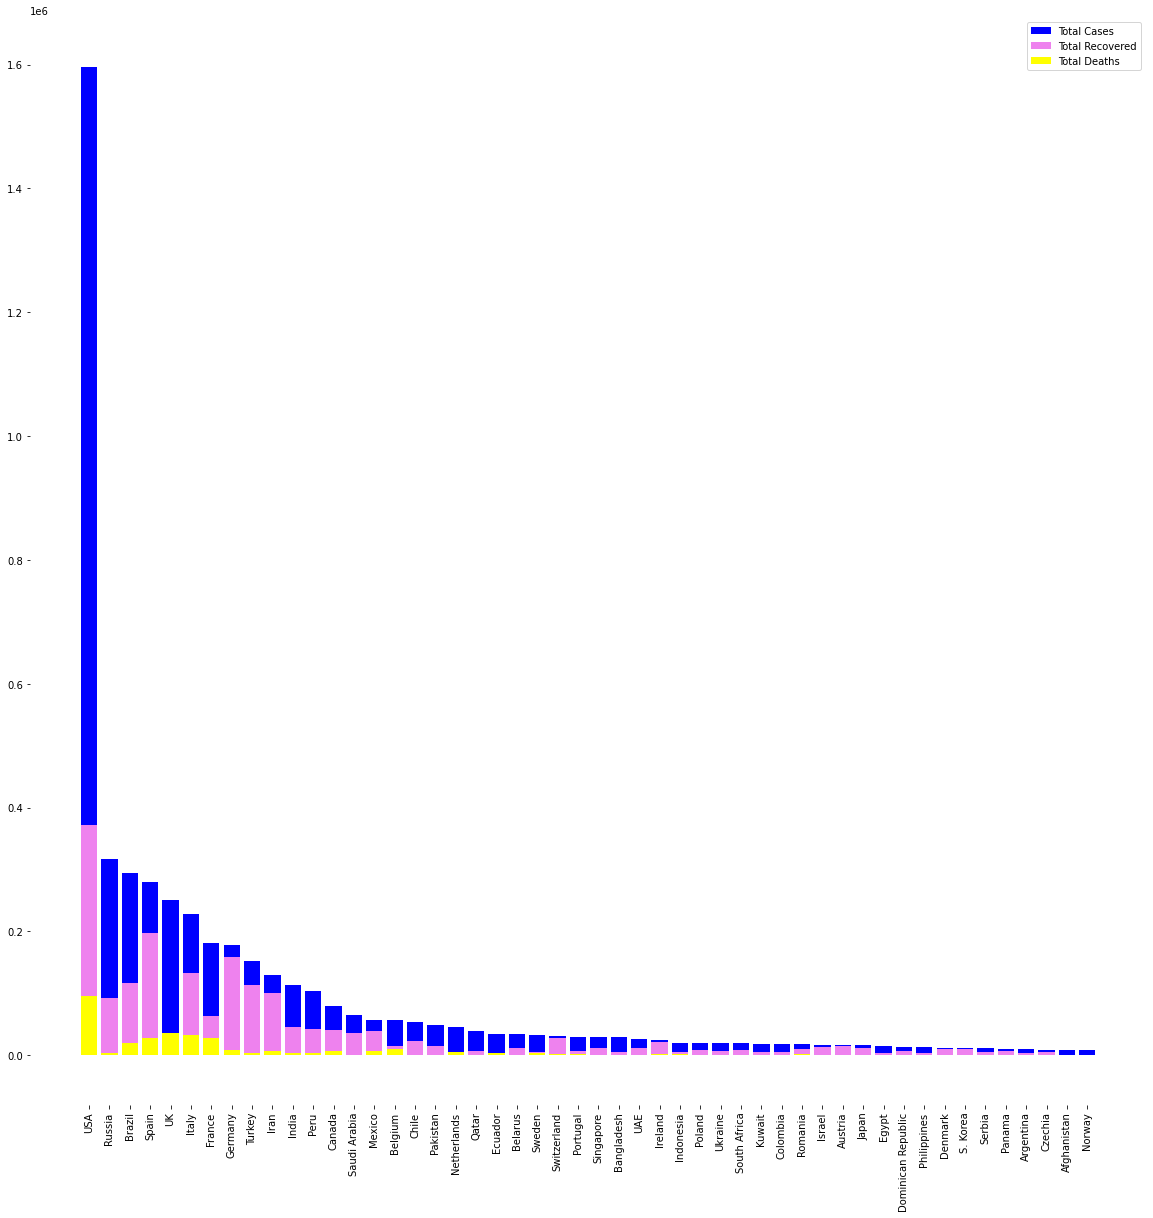

In [10]:
country1=Country1['country']

total_cases1=Country1['total_cases']
total_recovered1=Country1['total_recovered']
total_deaths1=Country1['total_deaths']
plt.figure(figsize=(20,20))
plt.bar(country1,total_cases1,linewidth=2,color='blue')
plt.bar(country1,total_recovered1,linewidth=2,color='violet')
plt.bar(country1,total_deaths1,linewidth=2,color='yellow')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.box(on=None)

Dataframe 2

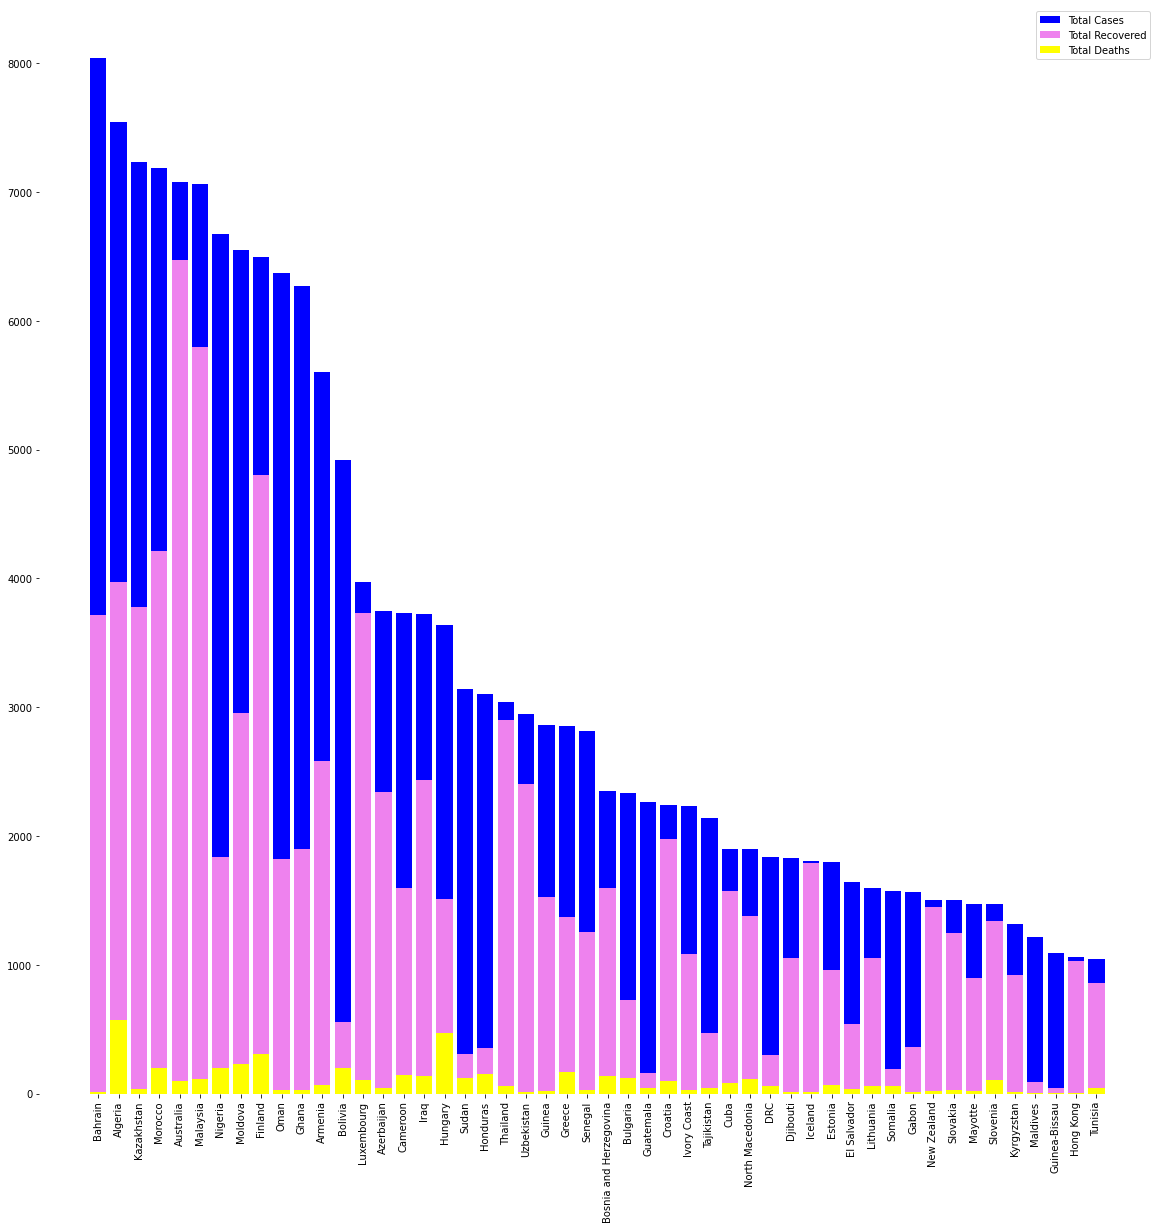

In [11]:
country2=Country2['country']

total_cases2=Country2['total_cases']
total_recovered2=Country2['total_recovered']
total_deaths2=Country2['total_deaths']
plt.figure(figsize=(20,20))
plt.bar(country2,total_cases2,linewidth=2,color='blue')
plt.bar(country2,total_recovered2,linewidth=2,color='violet')
plt.bar(country2,total_deaths2,linewidth=2,color='yellow')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.box(on=None)

DataFrame 3

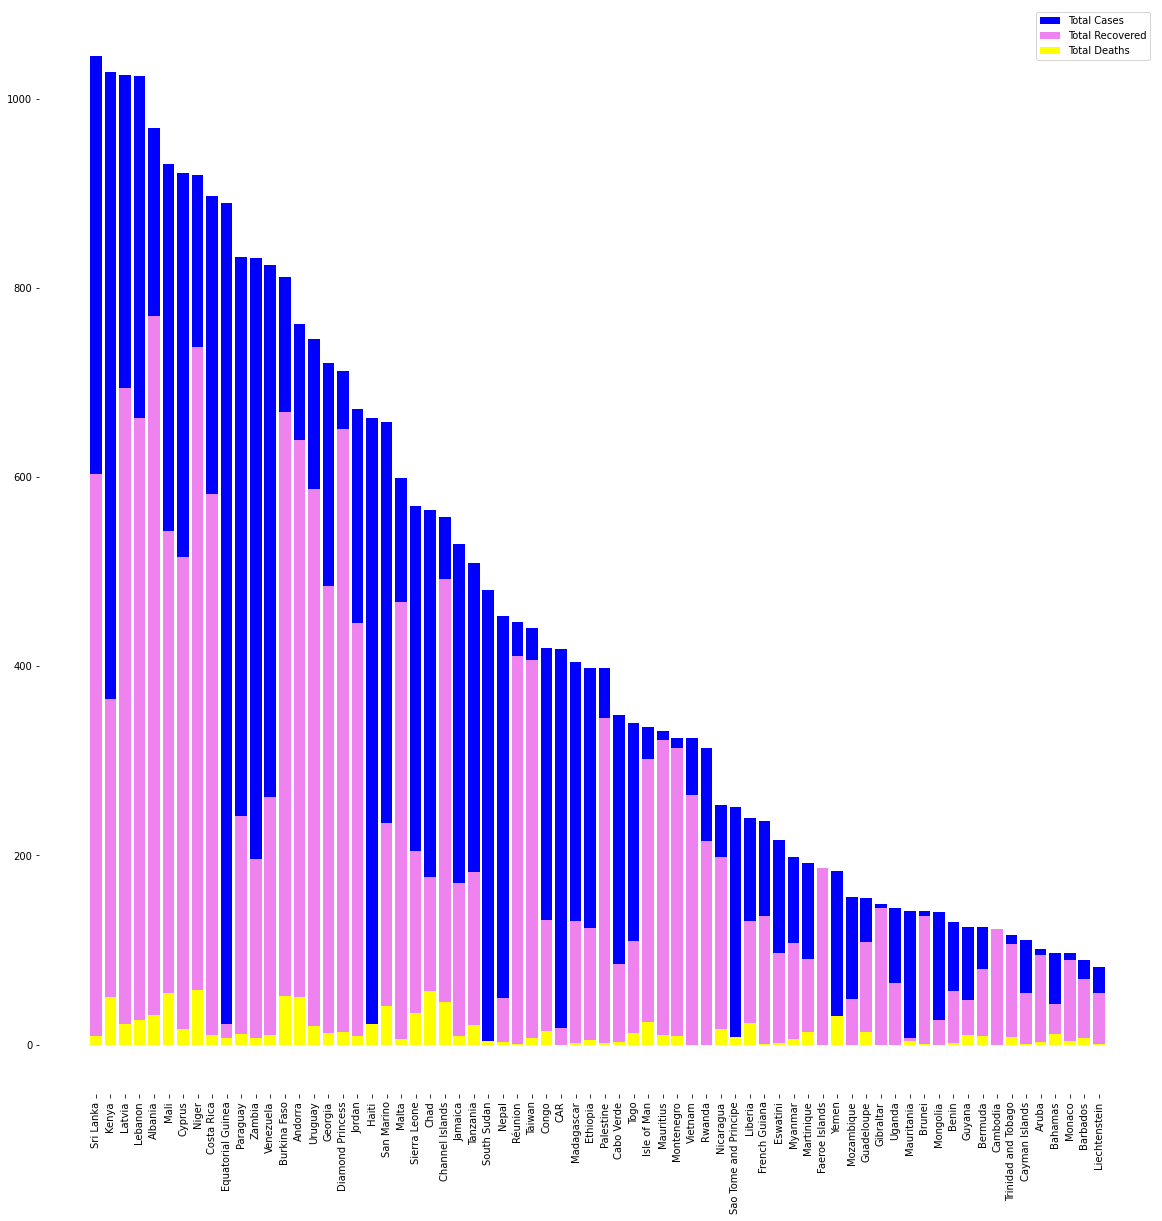

In [12]:
country3=Country3['country']

total_cases3=Country3['total_cases']
total_recovered3=Country3['total_recovered']
total_deaths3=Country3['total_deaths']
plt.figure(figsize=(20,20))
plt.bar(country3,total_cases3,linewidth=2,color='blue')
plt.bar(country3,total_recovered3,linewidth=2,color='violet')
plt.bar(country3,total_deaths3,linewidth=2,color='yellow')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.box(on=None)

Dataframe 4

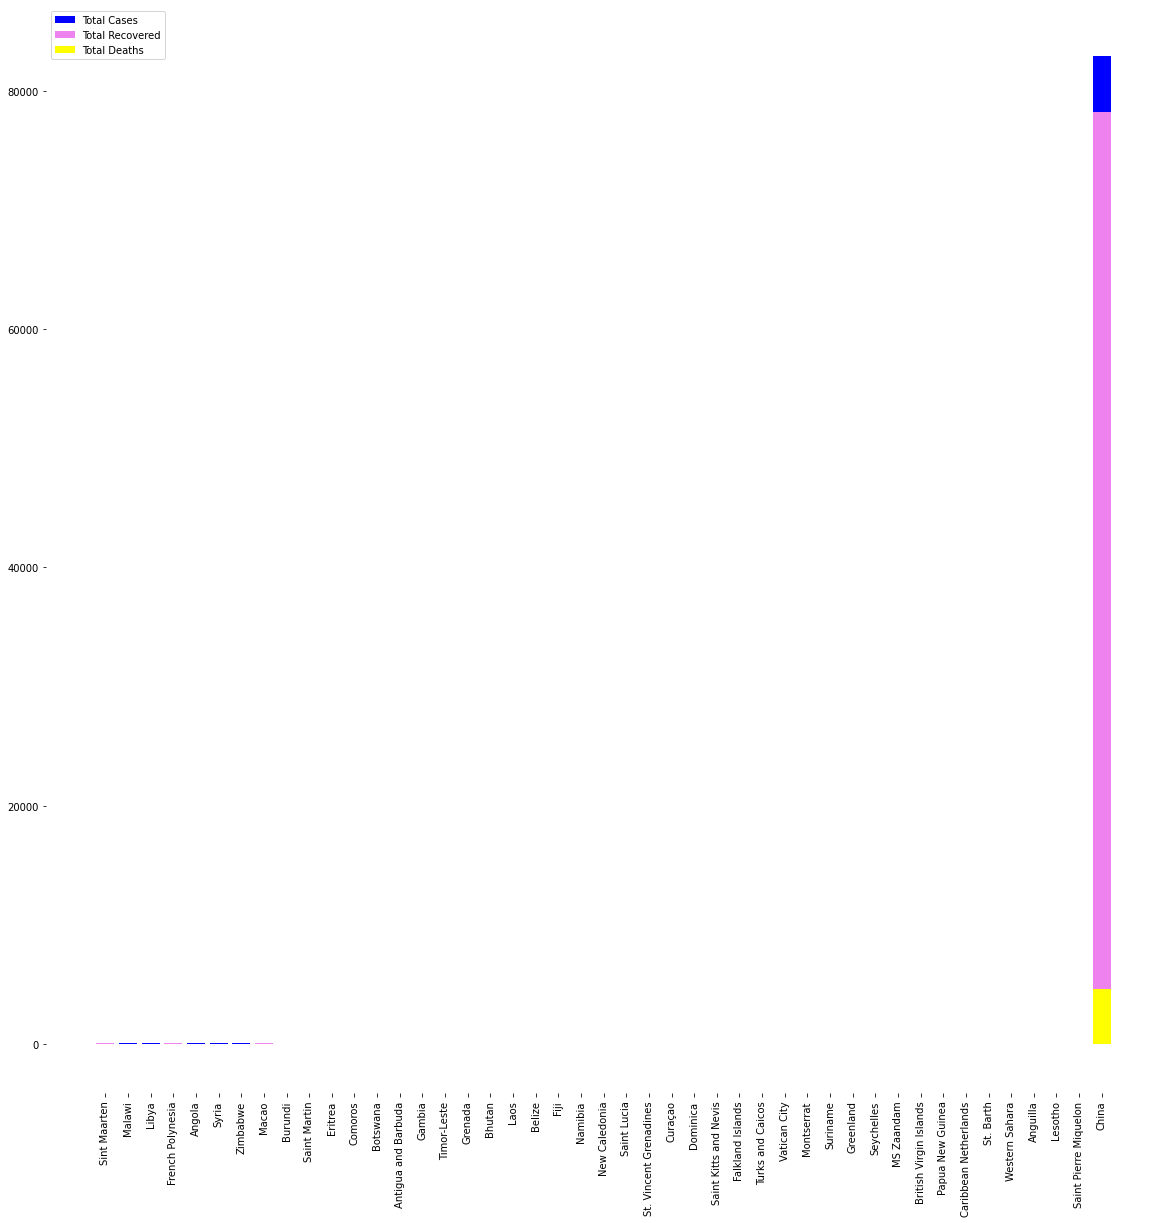

In [13]:
country4=Country4['country']

total_cases4=Country4['total_cases']
total_recovered4=Country4['total_recovered']
total_deaths4=Country4['total_deaths']
plt.figure(figsize=(20,20))
plt.bar(country4,total_cases4,linewidth=2,color='blue')
plt.bar(country4,total_recovered4,linewidth=2,color='violet')
plt.bar(country4,total_deaths4,linewidth=2,color='yellow')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.box(on=None)

Total Deaths WorldWide

In [14]:
san=r'/kaggle/input/world-countries/world-countries.json'
world=folium.Map(location=[51.579519,24.245497],tiles='Mapbox Bright',zoom_start=12)
folium.Choropleth(geo_data=san,data=Country,columns=['country','total_deaths'],key_on='feature.properties.name',fill_color='GnBu',fill_opacity=0.7,line_opacity=0.2).add_to(world)
world

Total Cases Worldwide

In [15]:
san=r'/kaggle/input/world-countries/world-countries.json'
world1=folium.Map(location=[51.579519,24.245497],tiles='Mapbox Bright',zoom_start=12)
folium.Choropleth(geo_data=san,data=Country,columns=['country','total_cases'],key_on='feature.properties.name',fill_color='GnBu',fill_opacity=0.7,line_opacity=0.2).add_to(world1)
world1

Total recovered Worldwide

In [16]:
san=r'/kaggle/input/world-countries/world-countries.json'
world3=folium.Map(location=[51.579519,24.245497],tiles='Mapbox Bright',zoom_start=12)
folium.Choropleth(geo_data=san,data=Country,columns=['country','total_recovered'],key_on='feature.properties.name',fill_color='PuBuGn',fill_opacity=0.7,line_opacity=0.2).add_to(world3)
world3

Comparing the states in different countries

In [17]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Yunnan,China,24.9740,101.4870,185,2,183.0,0,0.0,0.383023,0.0,0.0,1.081081,15630,CHN,0.000000,0.000000
270,Zacatecas,Mexico,22.7709,-102.5832,212,27,134.0,51,0.0,12.721837,0.0,0.0,12.735849,48432,MEX,0.000000,0.000000
271,Zhejiang,China,29.1832,120.0934,1268,1,1267.0,0,0.0,2.210214,0.0,0.0,0.078864,15631,CHN,0.000000,0.000000
272,Diamond Princess,Canada,0.0000,0.0000,1,1,0.0,0,0.0,0.000000,0.0,0.0,100.000000,12413,CAN,0.000000,0.000000


In [18]:
county.country_region.unique()

array(['US', 'Italy', 'Brazil', 'Mexico', 'Canada', 'Spain',
       'United Kingdom', 'China', 'Chile', 'Netherlands', 'Australia',
       'Germany', 'Denmark', 'France'], dtype=object)

USA

In [19]:
us_county=county[county['country_region']=='US']
us_county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [20]:
us1=us_county.set_index('province_state')
us1.head()

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


Best and Worst  Recovery  Rate

In [21]:
x=us1['confirmed']
y=us1['recovered']
c=us1['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate Diamond Princess is 1.0
Worst Rate Michigan is 0.9045445113094003


In [22]:
print('Most Affected US State',us1['deaths'].idxmax(),'with count of',us1['deaths'].max())
print('Least Affected US State',us1['deaths'].idxmin(),'with count of',us1['deaths'].min())

Most Affected US State New York with count of 28636
Least Affected US State American Samoa with count of 0


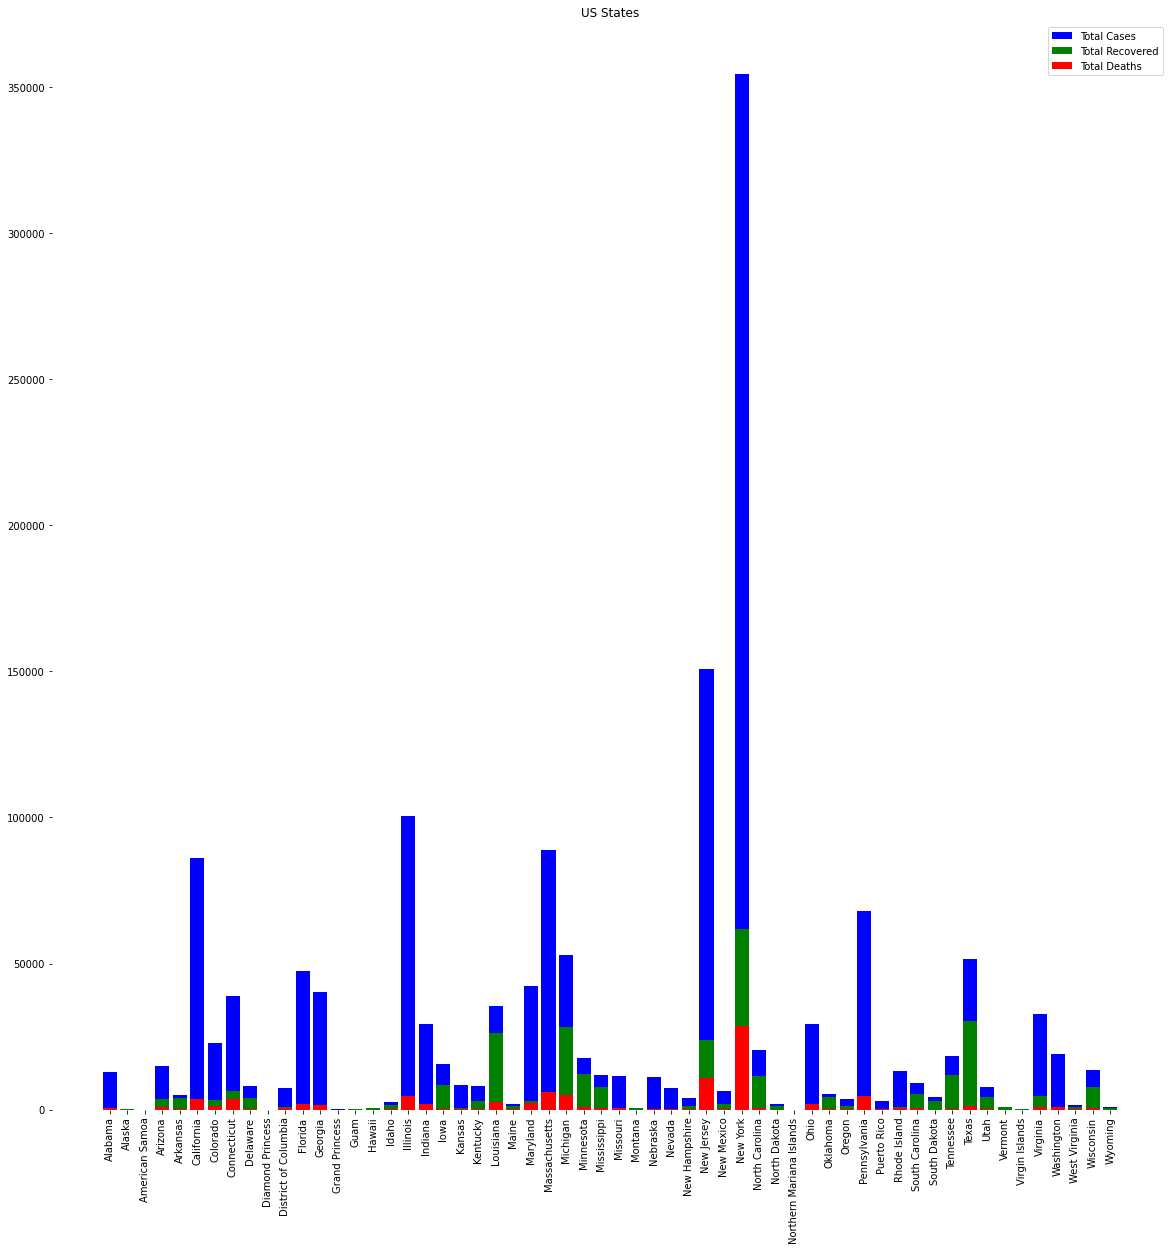

In [23]:
county=us_county['province_state']

confirmed=us_county['confirmed']
recovered=us_county['recovered']
deaths=us_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county,confirmed,linewidth=2,color='blue')
plt.bar(county,recovered,linewidth=2,color='green')
plt.bar(county,deaths,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('US States')
plt.box(on=None)

In [24]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Yunnan,China,24.9740,101.4870,185,2,183.0,0,0.0,0.383023,0.0,0.0,1.081081,15630,CHN,0.000000,0.000000
270,Zacatecas,Mexico,22.7709,-102.5832,212,27,134.0,51,0.0,12.721837,0.0,0.0,12.735849,48432,MEX,0.000000,0.000000
271,Zhejiang,China,29.1832,120.0934,1268,1,1267.0,0,0.0,2.210214,0.0,0.0,0.078864,15631,CHN,0.000000,0.000000
272,Diamond Princess,Canada,0.0000,0.0000,1,1,0.0,0,0.0,0.000000,0.0,0.0,100.000000,12413,CAN,0.000000,0.000000


CANADA

In [25]:
canada_county=county[county['country_region']=='Canada']
canada_county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
62,Alberta,Canada,53.9333,-116.5765,6735,128,5637.0,970,0.0,152.612218,0.0,0.0,1.900520,12401,CAN,0.0,0.0
91,British Columbia,Canada,53.7267,-127.6476,2467,149,2005.0,313,0.0,48.269224,0.0,0.0,6.039724,12402,CAN,0.0,0.0
162,Manitoba,Canada,53.7609,-98.8139,290,7,260.0,23,0.0,21.052372,0.0,0.0,2.413793,12403,CAN,0.0,0.0
182,New Brunswick,Canada,46.5653,-66.4619,120,0,120.0,0,0.0,15.384753,0.0,0.0,0.000000,12404,CAN,0.0,0.0
185,Newfoundland and Labrador,Canada,53.1355,-57.6604,260,3,253.0,4,0.0,49.869094,0.0,0.0,1.153846,12405,CAN,0.0,0.0
190,Northwest Territories,Canada,64.8255,-124.8457,5,0,5.0,0,0.0,11.134865,0.0,0.0,0.000000,12406,CAN,0.0,0.0
191,Nova Scotia,Canada,44.6820,-63.7443,1045,57,956.0,32,0.0,106.910074,0.0,0.0,5.454545,12407,CAN,0.0,0.0
196,Ontario,Canada,51.2538,-85.3232,25197,2079,18190.0,4928,0.0,171.270366,0.0,0.0,8.250982,12408,CAN,0.0,0.0
206,Prince Edward Island,Canada,46.5107,-63.4168,27,0,27.0,0,0.0,17.071536,0.0,0.0,0.000000,12409,CAN,0.0,0.0
210,Quebec,Canada,52.9399,-73.5491,44784,3719,12822.0,28243,0.0,524.545678,0.0,0.0,8.304305,12410,CAN,0.0,0.0


In [26]:
canada=canada_county.set_index('province_state')
canada

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Alberta,Canada,53.9333,-116.5765,6735,128,5637.0,970,0.0,152.612218,0.0,0.0,1.900520,12401,CAN,0.0,0.0
British Columbia,Canada,53.7267,-127.6476,2467,149,2005.0,313,0.0,48.269224,0.0,0.0,6.039724,12402,CAN,0.0,0.0
Manitoba,Canada,53.7609,-98.8139,290,7,260.0,23,0.0,21.052372,0.0,0.0,2.413793,12403,CAN,0.0,0.0
New Brunswick,Canada,46.5653,-66.4619,120,0,120.0,0,0.0,15.384753,0.0,0.0,0.000000,12404,CAN,0.0,0.0
Newfoundland and Labrador,Canada,53.1355,-57.6604,260,3,253.0,4,0.0,49.869094,0.0,0.0,1.153846,12405,CAN,0.0,0.0
Northwest Territories,Canada,64.8255,-124.8457,5,0,5.0,0,0.0,11.134865,0.0,0.0,0.000000,12406,CAN,0.0,0.0
Nova Scotia,Canada,44.6820,-63.7443,1045,57,956.0,32,0.0,106.910074,0.0,0.0,5.454545,12407,CAN,0.0,0.0
Ontario,Canada,51.2538,-85.3232,25197,2079,18190.0,4928,0.0,171.270366,0.0,0.0,8.250982,12408,CAN,0.0,0.0
Prince Edward Island,Canada,46.5107,-63.4168,27,0,27.0,0,0.0,17.071536,0.0,0.0,0.000000,12409,CAN,0.0,0.0


Affected Results

In [27]:
print('Most Affected Canada State',canada['deaths'].idxmax(),'with count of',canada['deaths'].max())
print('Least Affected Canada',canada['deaths'].idxmin(),'with count of',canada['deaths'].min())

Most Affected Canada State Quebec with count of 3719
Least Affected Canada New Brunswick with count of 0


Recovery Rates

In [28]:
x=canada['confirmed']
y=canada['recovered']
c=canada['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate New Brunswick is 1.0
Worst Rate Diamond Princess is 0.0


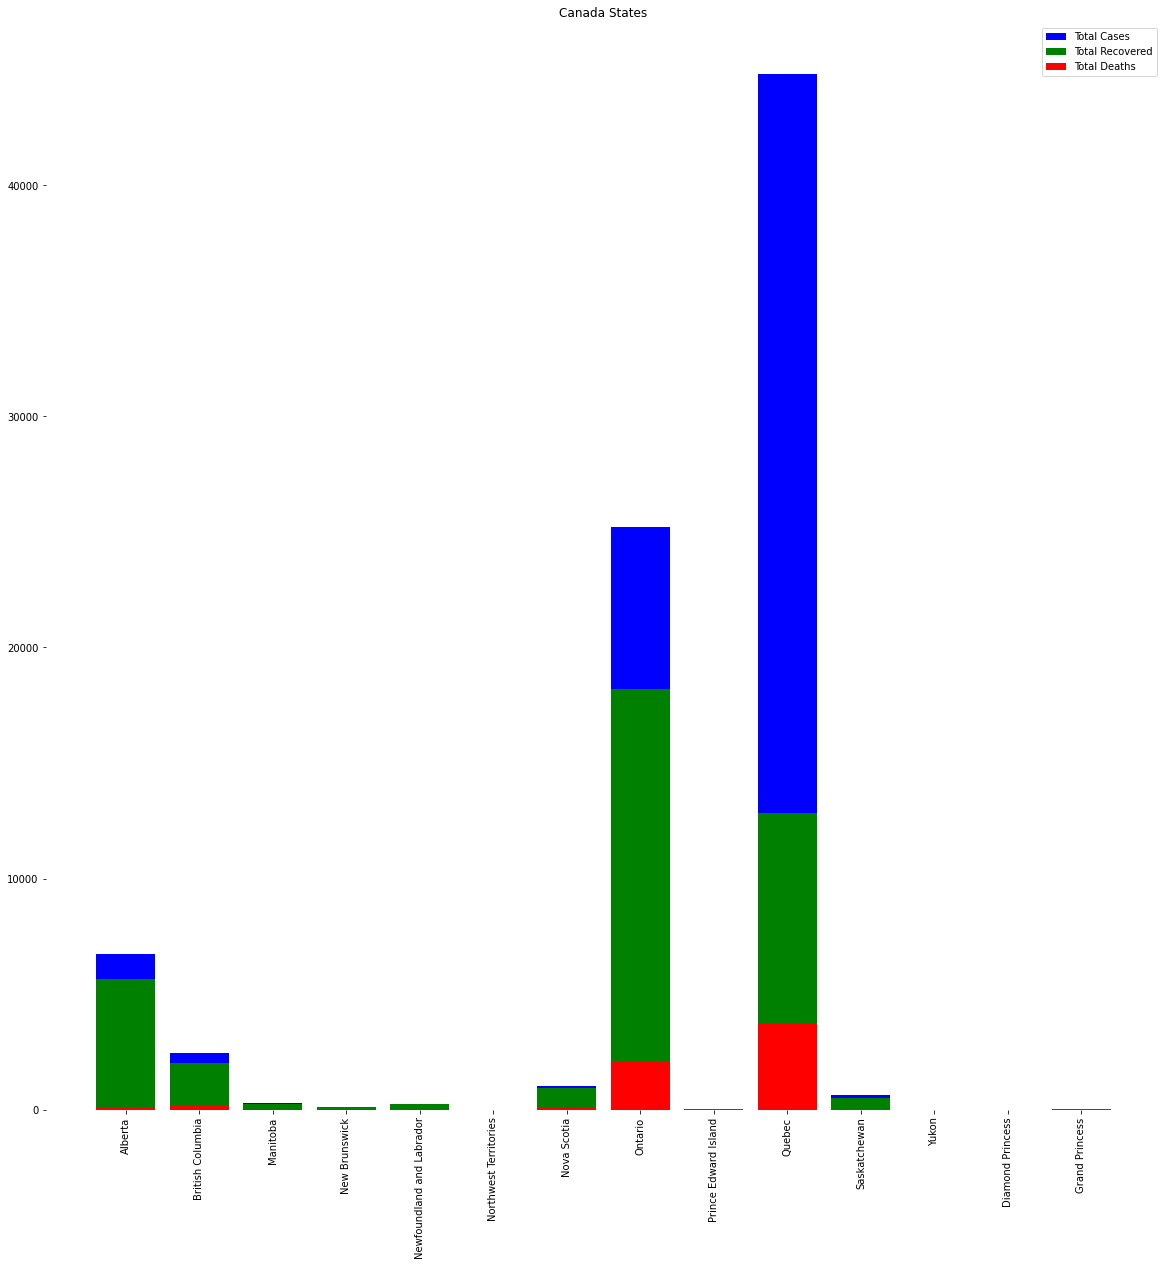

In [29]:
county1=canada_county['province_state']

confirmed1=canada_county['confirmed']
recovered1=canada_county['recovered']
deaths1=canada_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county1,confirmed1,linewidth=2,color='blue')
plt.bar(county1,recovered1,linewidth=2,color='green')
plt.bar(county1,deaths1,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('Canada States')
plt.box(on=None)

In [30]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


CHINA

In [31]:
china_county=county[county['country_region']=='China']
china_county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
67,Anhui,China,31.8257,117.2264,991,6,985.0,0,0.0,1.567046,0.0,0.0,0.605449,15601,CHN,0.0,0.0
84,Beijing,China,40.1824,116.4142,593,9,578.0,6,0.0,2.753018,0.0,0.0,1.517707,15602,CHN,0.0,0.0
108,Chongqing,China,30.0572,107.8740,579,6,573.0,0,0.0,1.866538,0.0,0.0,1.036269,15603,CHN,0.0,0.0
124,Fujian,China,26.0789,117.9874,356,1,355.0,0,0.0,0.903324,0.0,0.0,0.280899,15604,CHN,0.0,0.0
126,Gansu,China,35.7518,104.2861,139,2,137.0,0,0.0,0.527114,0.0,0.0,1.438849,15605,CHN,0.0,0.0


In [32]:
china=china_county.set_index('province_state')
china

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Anhui,China,31.8257,117.2264,991,6,985.0,0,0.0,1.567046,0.0,0.0,0.605449,15601,CHN,0.0,0.0
Beijing,China,40.1824,116.4142,593,9,578.0,6,0.0,2.753018,0.0,0.0,1.517707,15602,CHN,0.0,0.0
Chongqing,China,30.0572,107.8740,579,6,573.0,0,0.0,1.866538,0.0,0.0,1.036269,15603,CHN,0.0,0.0
Fujian,China,26.0789,117.9874,356,1,355.0,0,0.0,0.903324,0.0,0.0,0.280899,15604,CHN,0.0,0.0
Gansu,China,35.7518,104.2861,139,2,137.0,0,0.0,0.527114,0.0,0.0,1.438849,15605,CHN,0.0,0.0
Guangdong,China,23.3417,113.4244,1590,8,1579.0,3,0.0,1.401375,0.0,0.0,0.503145,15606,CHN,0.0,0.0
Guangxi,China,23.8298,108.7881,254,2,252.0,0,0.0,0.515631,0.0,0.0,0.787402,15607,CHN,0.0,0.0
Guizhou,China,26.8154,106.8748,147,2,145.0,0,0.0,0.408333,0.0,0.0,1.360544,15608,CHN,0.0,0.0
Hainan,China,19.1959,109.7453,169,6,162.0,1,0.0,1.809422,0.0,0.0,3.550296,15609,CHN,0.0,0.0


Affected Areas 

In [33]:
print('Most Affected China State',china['deaths'].idxmax(),'with count of',china['deaths'].max())
print('Least Affected China State',china['deaths'].idxmin(),'with count of',china['deaths'].min())

Most Affected China State Hubei with count of 4512
Least Affected China State Jiangsu with count of 0


Recovery Rates

In [34]:
x=china['confirmed']
y=china['recovered']
c=china['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate Jiangsu is 1.0
Worst Rate Hubei is 0.9337785279225068


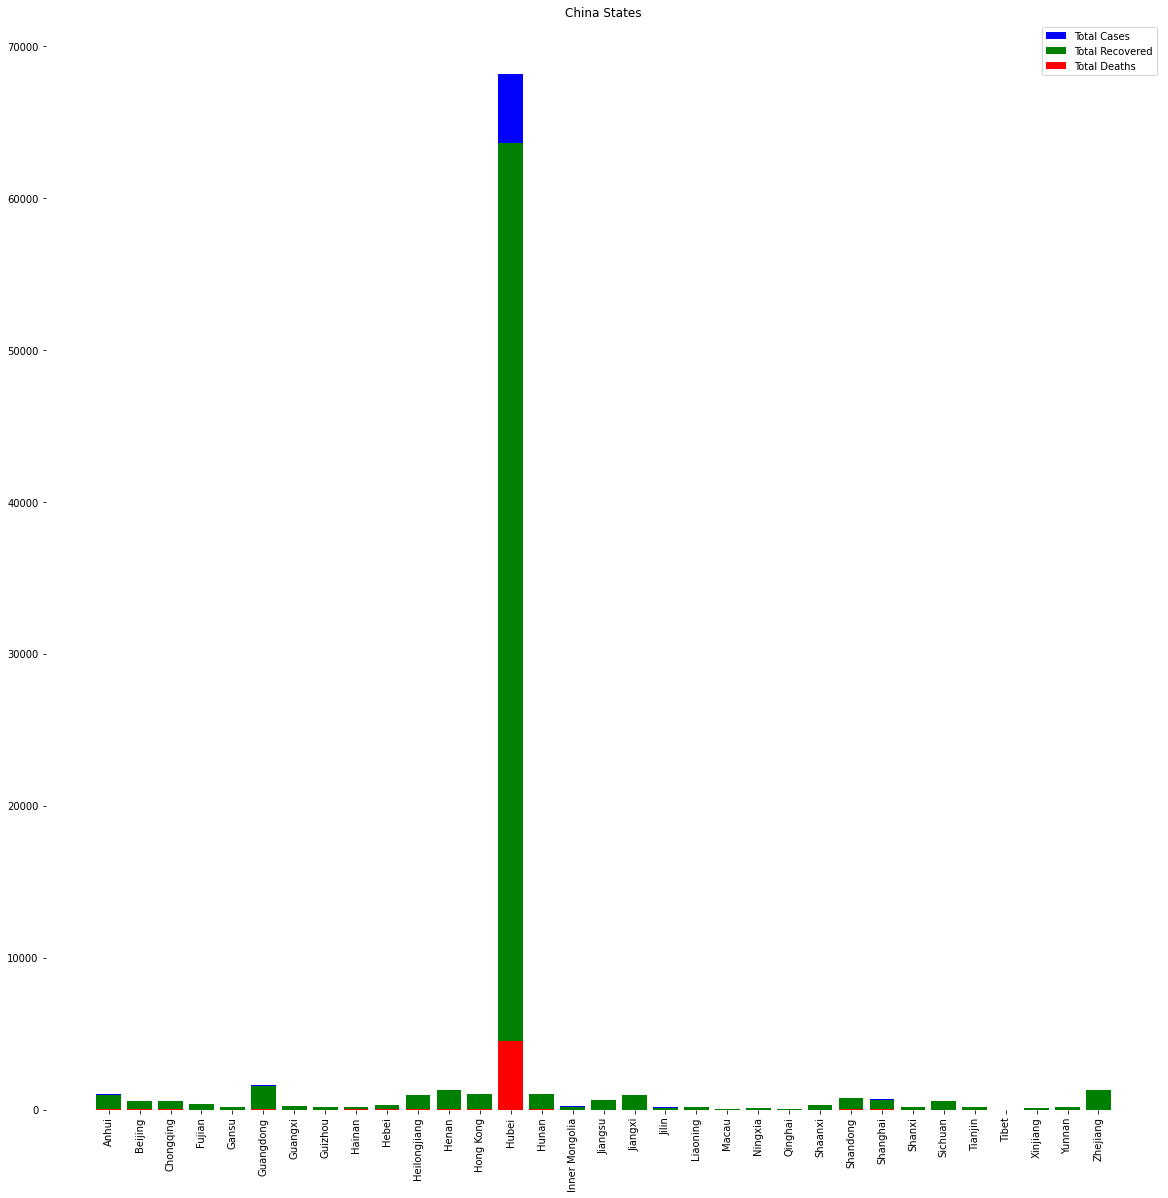

In [35]:
county1=china_county['province_state']

confirmed1=china_county['confirmed']
recovered1=china_county['recovered']
deaths1=china_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county1,confirmed1,linewidth=2,color='blue')
plt.bar(county1,recovered1,linewidth=2,color='green')
plt.bar(county1,deaths1,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('China States')
plt.box(on=None)

In [36]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Yunnan,China,24.9740,101.4870,185,2,183.0,0,0.0,0.383023,0.0,0.0,1.081081,15630,CHN,0.000000,0.000000
270,Zacatecas,Mexico,22.7709,-102.5832,212,27,134.0,51,0.0,12.721837,0.0,0.0,12.735849,48432,MEX,0.000000,0.000000
271,Zhejiang,China,29.1832,120.0934,1268,1,1267.0,0,0.0,2.210214,0.0,0.0,0.078864,15631,CHN,0.000000,0.000000
272,Diamond Princess,Canada,0.0000,0.0000,1,1,0.0,0,0.0,0.000000,0.0,0.0,100.000000,12413,CAN,0.000000,0.000000


ITALY

In [37]:
italy_county=county[county['country_region']=='Italy']
italy_county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
58,Abruzzo,Italy,42.351222,13.398438,3205,389,1499.0,1317,0.0,244.361762,0.0,0.0,12.137285,38013,ITA,0.0,0.0
82,Basilicata,Italy,40.639471,15.805148,393,27,293.0,73,0.0,69.820864,0.0,0.0,6.870229,38017,ITA,0.0,0.0
94,Calabria,Italy,38.905976,16.594402,1156,96,707.0,353,0.0,59.369400,0.0,0.0,8.304498,38018,ITA,0.0,0.0
95,Campania,Italy,40.839566,14.250850,4714,401,2871.0,1442,0.0,81.252159,0.0,0.0,8.506576,38015,ITA,0.0,0.0
116,Emilia-Romagna,Italy,44.494367,11.341721,27364,4008,18258.0,5098,0.0,613.614556,0.0,0.0,14.646981,38008,ITA,0.0,0.0


In [38]:
italy=italy_county.set_index('province_state')
italy

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Abruzzo,Italy,42.351222,13.398438,3205,389,1499.0,1317,0.0,244.361762,0.0,0.0,12.137285,38013,ITA,0.0,0.0
Basilicata,Italy,40.639471,15.805148,393,27,293.0,73,0.0,69.820864,0.0,0.0,6.870229,38017,ITA,0.0,0.0
Calabria,Italy,38.905976,16.594402,1156,96,707.0,353,0.0,59.369400,0.0,0.0,8.304498,38018,ITA,0.0,0.0
Campania,Italy,40.839566,14.250850,4714,401,2871.0,1442,0.0,81.252159,0.0,0.0,8.506576,38015,ITA,0.0,0.0
Emilia-Romagna,Italy,44.494367,11.341721,27364,4008,18258.0,5098,0.0,613.614556,0.0,0.0,14.646981,38008,ITA,0.0,0.0
Friuli Venezia Giulia,Italy,45.649435,13.768136,3209,322,2291.0,596,0.0,264.067412,0.0,0.0,10.034279,38006,ITA,0.0,0.0
Lazio,Italy,41.892770,12.483667,7533,647,3100.0,3786,0.0,128.132249,0.0,0.0,8.588876,38012,ITA,0.0,0.0
Liguria,Italy,44.411493,8.932699,9289,1386,5725.0,2178,0.0,599.042976,0.0,0.0,14.920874,38007,ITA,0.0,0.0
Lombardia,Italy,45.466794,9.190347,85775,15662,43442.0,26671,0.0,852.585548,0.0,0.0,18.259400,38003,ITA,0.0,0.0


In [39]:
print('Most Affected Italy State',italy['deaths'].idxmax(),'with count of',italy['deaths'].max())
print('Least Affected Italy State',italy['deaths'].idxmin(),'with count of',italy['deaths'].min())

Most Affected Italy State Lombardia with count of 15662
Least Affected Italy State Molise with count of 22


In [40]:
x=italy['confirmed']
y=italy['recovered']
c=italy['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate Umbria is 0.9481429572529783
Worst Rate Lombardia is 0.8174060040804431


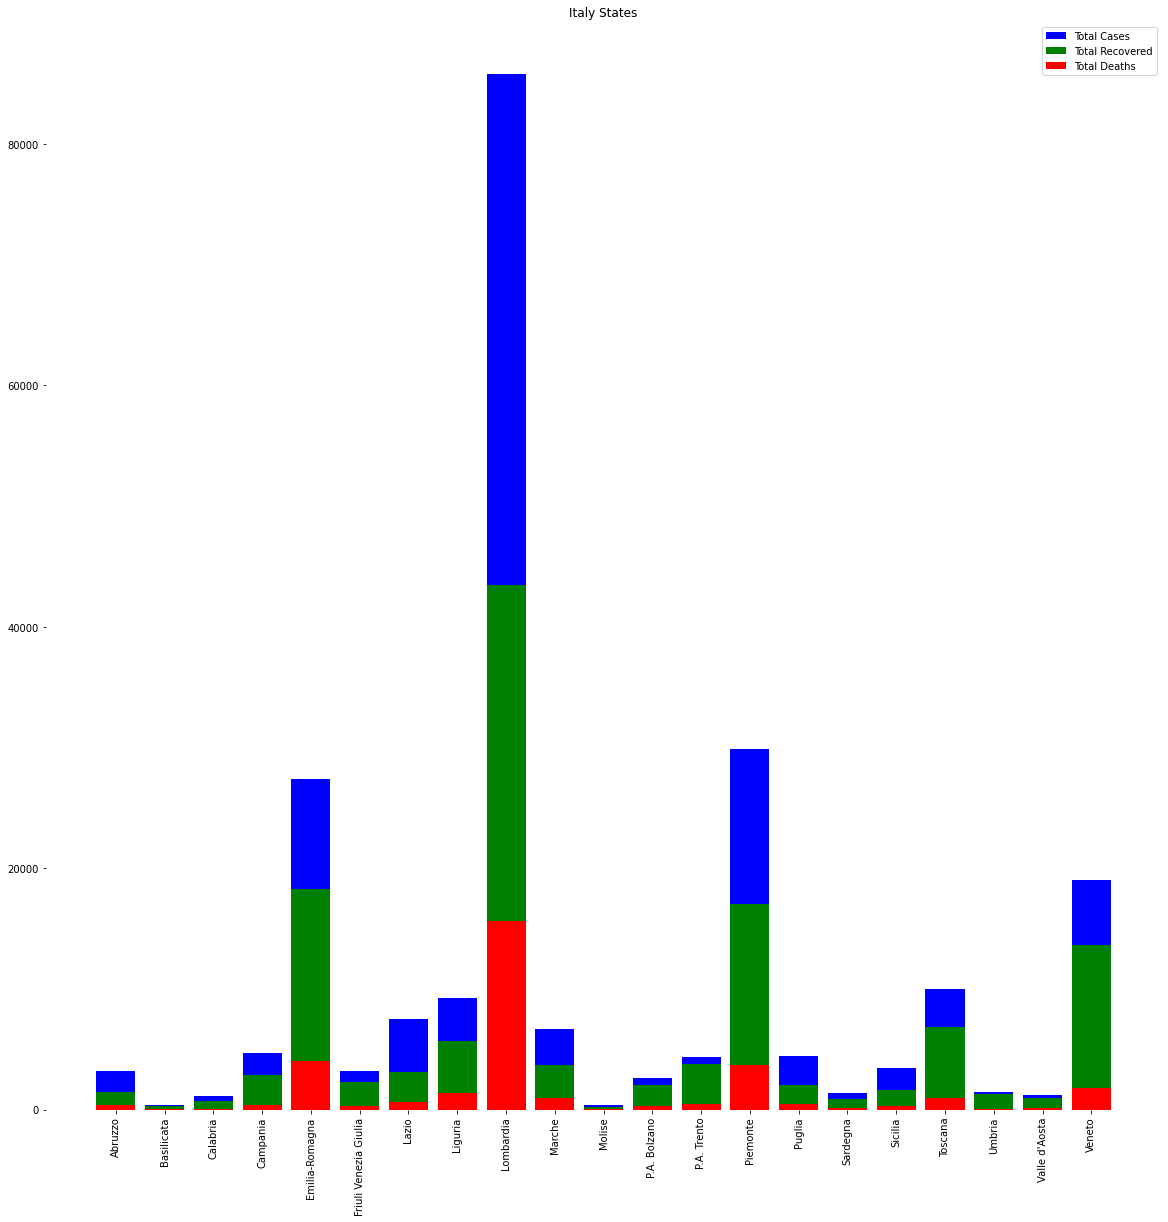

In [41]:
county1=italy_county['province_state']

confirmed1=italy_county['confirmed']
recovered1=italy_county['recovered']
deaths1=italy_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county1,confirmed1,linewidth=2,color='blue')
plt.bar(county1,recovered1,linewidth=2,color='green')
plt.bar(county1,deaths1,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('Italy States')
plt.box(on=None)

In [42]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


UNITED KINGDOM

In [43]:
uk_county=county[county['country_region']=='United Kingdom']
uk_county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
66,Anguilla,United Kingdom,18.2206,-63.0686,3,0,3.0,0,0.0,19.997334,0.0,0.0,0.000000,660,AIA,0.0,0.0
86,Bermuda,United Kingdom,32.3078,-64.7505,125,9,80.0,36,0.0,200.729048,0.0,0.0,7.200000,60,BMU,0.0,0.0
92,British Virgin Islands,United Kingdom,18.4207,-64.6400,8,1,6.0,1,0.0,26.457651,0.0,0.0,12.500000,92,VGB,0.0,0.0
102,Cayman Islands,United Kingdom,19.3133,-81.2546,111,1,55.0,55,0.0,168.898357,0.0,0.0,0.900901,136,CYM,0.0,0.0
105,Channel Islands,United Kingdom,49.3723,-2.3644,558,45,492.0,21,0.0,327.274647,0.0,0.0,8.064516,8261,GBR,0.0,0.0


In [44]:
uk=uk_county.set_index('province_state')
uk

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Anguilla,United Kingdom,18.220600,-63.068600,3,0,3.0,0,0.0,19.997334,0.0,0.0,0.000000,660,AIA,0.0,0.0
Bermuda,United Kingdom,32.307800,-64.750500,125,9,80.0,36,0.0,200.729048,0.0,0.0,7.200000,60,BMU,0.0,0.0
British Virgin Islands,United Kingdom,18.420700,-64.640000,8,1,6.0,1,0.0,26.457651,0.0,0.0,12.500000,92,VGB,0.0,0.0
Cayman Islands,United Kingdom,19.313300,-81.254600,111,1,55.0,55,0.0,168.898357,0.0,0.0,0.900901,136,CYM,0.0,0.0
Channel Islands,United Kingdom,49.372300,-2.364400,558,45,492.0,21,0.0,327.274647,0.0,0.0,8.064516,8261,GBR,0.0,0.0
Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,13,0,13.0,0,0.0,373.241459,0.0,0.0,0.000000,238,FLK,0.0,0.0
Gibraltar,United Kingdom,36.140800,-5.353600,149,0,145.0,4,0.0,442.254608,0.0,0.0,0.000000,292,GIB,0.0,0.0
Isle of Man,United Kingdom,54.236100,-4.548100,336,24,302.0,10,0.0,395.145357,0.0,0.0,7.142857,833,IMN,0.0,0.0
Montserrat,United Kingdom,16.742498,-62.187366,11,1,10.0,0,0.0,220.044009,0.0,0.0,9.090909,500,MSR,0.0,0.0


Affected Areas

In [45]:
print('Most Affected United Kingdom State',uk['deaths'].idxmax(),'with count of',uk['deaths'].max())
print('Least Affected United Kingdom',uk['deaths'].idxmin(),'with count of',uk['deaths'].min())

Most Affected United Kingdom State Channel Islands with count of 45
Least Affected United Kingdom Anguilla with count of 0


Recovery Rates

In [46]:
x=uk['confirmed']
y=uk['recovered']
c=uk['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate Anguilla is 1.0
Worst Rate British Virgin Islands is 0.875


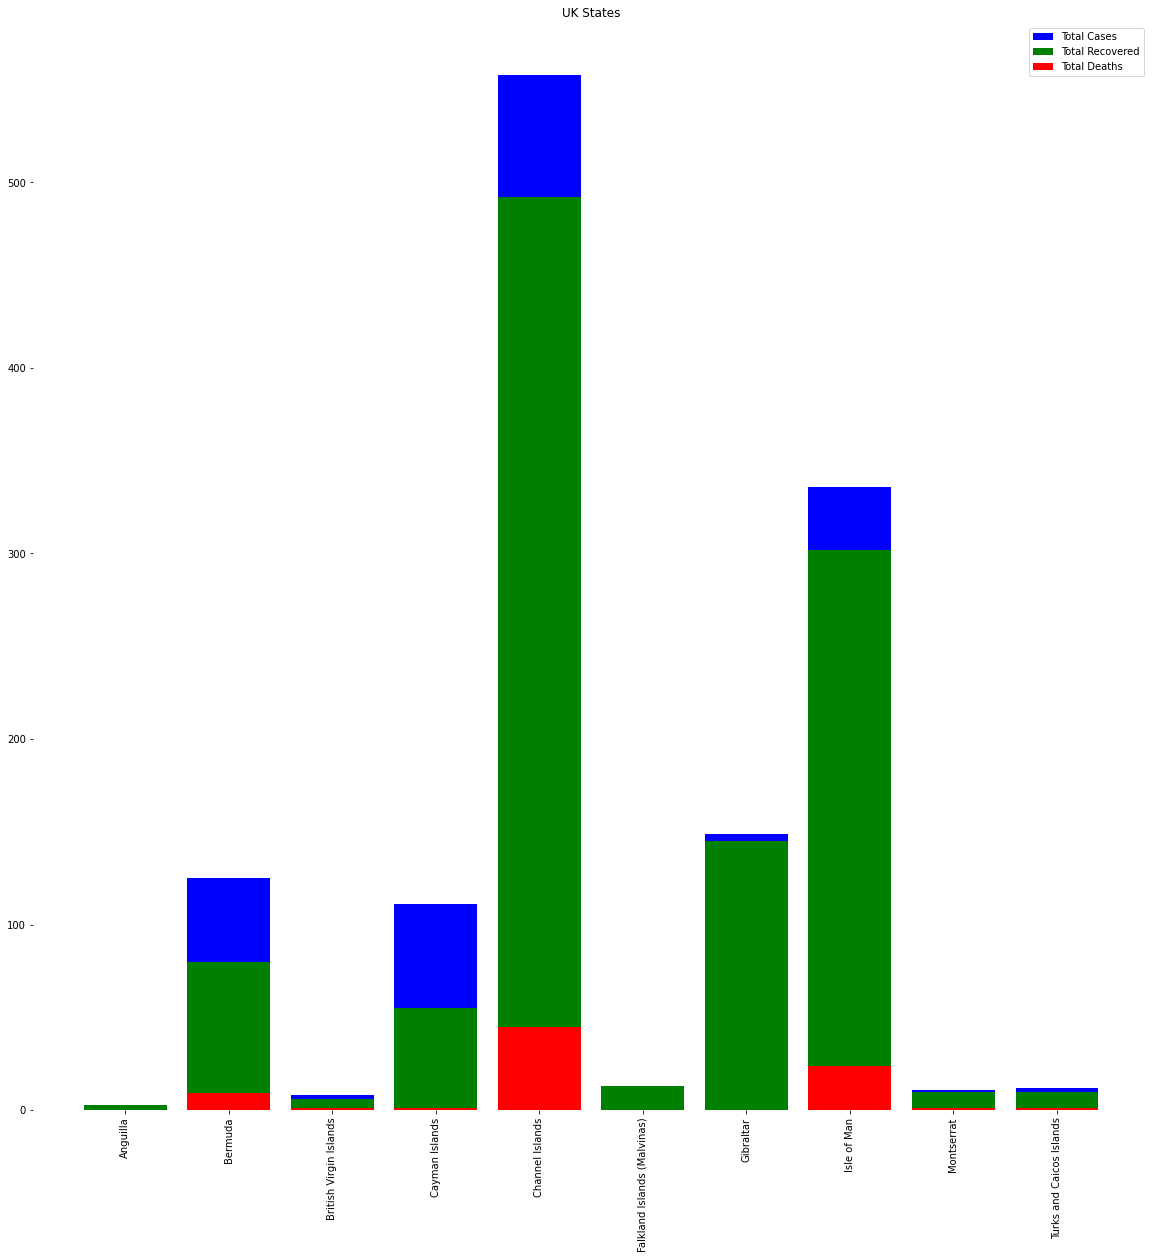

In [47]:
county1=uk_county['province_state']

confirmed1=uk_county['confirmed']
recovered1=uk_county['recovered']
deaths1=uk_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county1,confirmed1,linewidth=2,color='blue')
plt.bar(county1,recovered1,linewidth=2,color='green')
plt.bar(county1,deaths1,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('UK States')
plt.box(on=None)

In [48]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


GERMANY

In [49]:
germany_county=county[county['country_region']=='Germany']
germany_county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
77,Baden-Wurttemberg,Germany,48.6616,9.3501,34175,1680,30800.0,1695,0.0,308.730278,0.0,0.0,4.915874,27601,DEU,0.0,0.0
83,Bayern,Germany,48.7904,11.4979,46268,2370,41060.0,2838,0.0,353.819585,0.0,0.0,5.122331,27602,DEU,0.0,0.0
85,Berlin,Germany,52.5200,13.4050,6555,186,5959.0,410,0.0,179.843976,0.0,0.0,2.837529,27603,DEU,0.0,0.0
89,Brandenburg,Germany,52.4125,12.5316,3224,167,2900.0,157,0.0,128.348190,0.0,0.0,5.179901,27604,DEU,0.0,0.0
90,Bremen,Germany,53.0793,8.8017,1276,39,1000.0,237,0.0,186.826670,0.0,0.0,3.056426,27605,DEU,0.0,0.0


In [50]:
germany=germany_county.set_index('province_state')
germany

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Baden-Wurttemberg,Germany,48.6616,9.3501,34175,1680,30800.0,1695,0.0,308.730278,0.0,0.0,4.915874,27601,DEU,0.0,0.0
Bayern,Germany,48.7904,11.4979,46268,2370,41060.0,2838,0.0,353.819585,0.0,0.0,5.122331,27602,DEU,0.0,0.0
Berlin,Germany,52.5200,13.4050,6555,186,5959.0,410,0.0,179.843976,0.0,0.0,2.837529,27603,DEU,0.0,0.0
Brandenburg,Germany,52.4125,12.5316,3224,167,2900.0,157,0.0,128.348190,0.0,0.0,5.179901,27604,DEU,0.0,0.0
Bremen,Germany,53.0793,8.8017,1276,39,1000.0,237,0.0,186.826670,0.0,0.0,3.056426,27605,DEU,0.0,0.0
Hamburg,Germany,53.5511,9.9937,5053,239,4600.0,214,0.0,274.443712,0.0,0.0,4.729863,27606,DEU,0.0,0.0
Hessen,Germany,50.6521,9.1624,9574,451,8300.0,823,0.0,152.797508,0.0,0.0,4.710675,27607,DEU,0.0,0.0
Mecklenburg-Vorpommern,Germany,53.6127,12.4296,763,20,700.0,43,0.0,47.400873,0.0,0.0,2.621232,27608,DEU,0.0,0.0
Niedersachsen,Germany,52.6367,9.8451,11399,570,10100.0,729,0.0,142.800805,0.0,0.0,5.000439,27609,DEU,0.0,0.0


Affected Areas

In [51]:
print('Most Affected Germnay State',germany['deaths'].idxmax(),'with count of',germany['deaths'].max())
print('Least Affected Germany',germany['deaths'].idxmin(),'with count of',germany['deaths'].min())

Most Affected Germnay State Bayern with count of 2370
Least Affected Germany Unknown with count of 0


Recovery Rates

In [52]:
x=germany['confirmed']
y=germany['recovered']
c=germany['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate Unknown is 1.0
Worst Rate Saarland is 0.9402875046074456


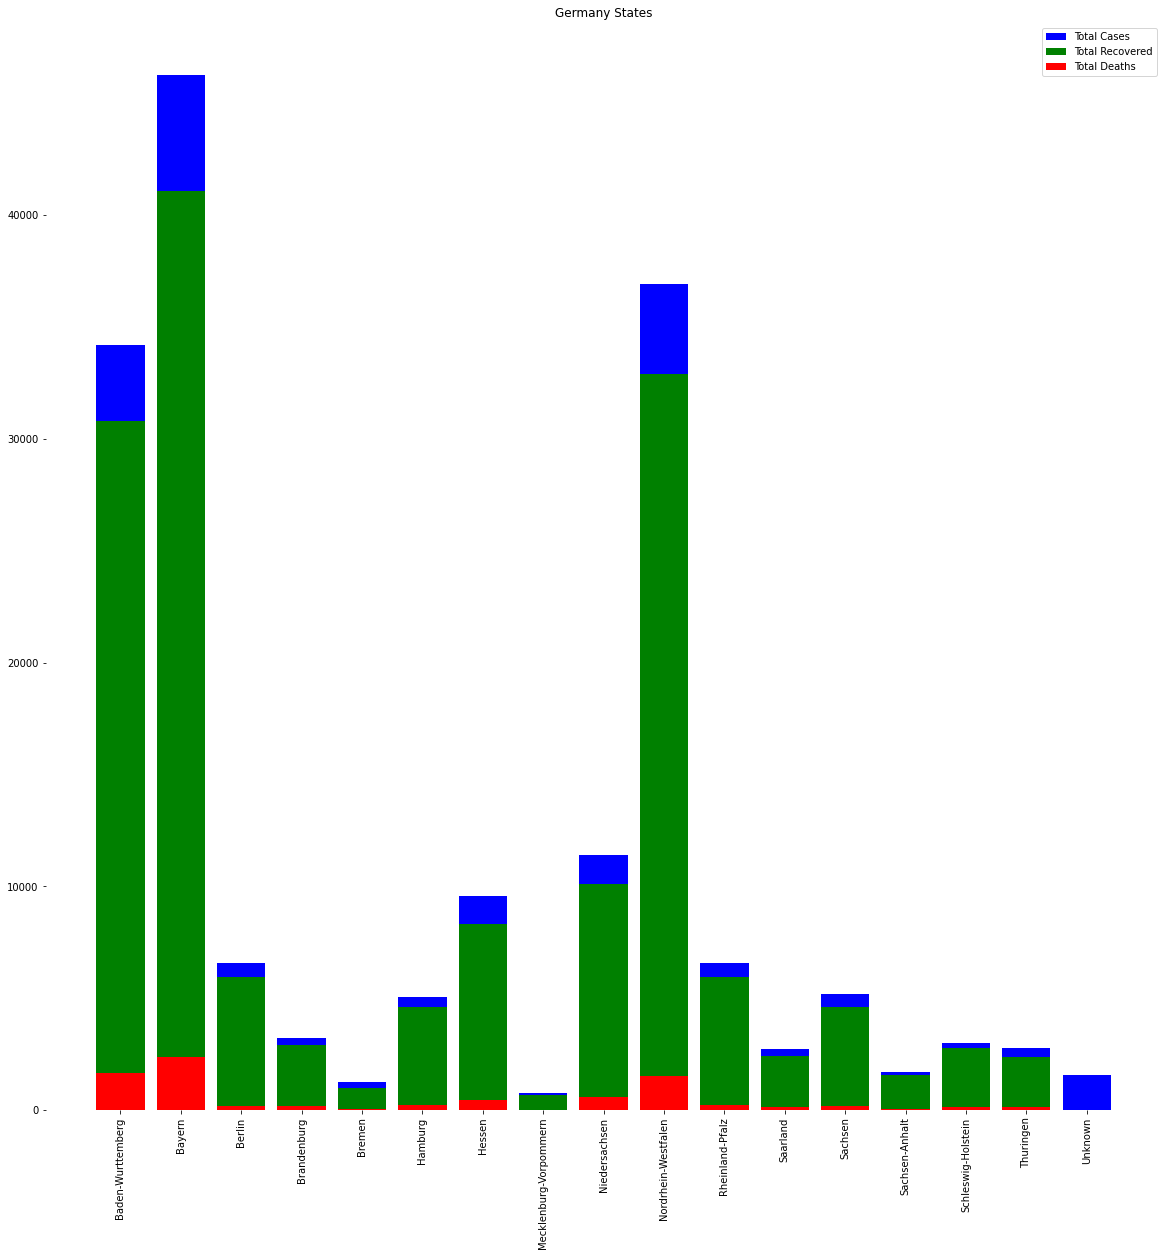

In [53]:
county1=germany_county['province_state']

confirmed1=germany_county['confirmed']
recovered1=germany_county['recovered']
deaths1=germany_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county1,confirmed1,linewidth=2,color='blue')
plt.bar(county1,recovered1,linewidth=2,color='green')
plt.bar(county1,deaths1,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('Germany States')
plt.box(on=None)

In [54]:
county=pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
county.fillna(0,inplace=True)
county=county.drop('last_update',axis=1)
county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [55]:
australia_county=county[county['country_region']=='Australia']
australia_county.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
75,Australian Capital Territory,Australia,-35.4735,149.0124,107,3,104.0,0,0.0,24.994160,0.0,0.0,2.803738,3601,AUS,0.0,0.0
184,New South Wales,Australia,-33.8688,151.2093,3082,47,2648.0,387,0.0,37.965016,0.0,0.0,1.524984,3602,AUS,0.0,0.0
189,Northern Territory,Australia,-12.4634,130.8456,29,0,29.0,0,0.0,11.807818,0.0,0.0,0.000000,3603,AUS,0.0,0.0
211,Queensland,Australia,-27.4698,153.0251,1058,6,1040.0,12,0.0,20.682240,0.0,0.0,0.567108,3604,AUS,0.0,0.0
242,South Australia,Australia,-34.9285,138.6007,439,4,435.0,0,0.0,24.992884,0.0,0.0,0.911162,3605,AUS,0.0,0.0


In [56]:
australia=australia_county.set_index('province_state')
australia

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
province_state,,,,,,,,,,,,,,,,
Australian Capital Territory,Australia,-35.4735,149.0124,107,3,104.0,0,0.0,24.994160,0.0,0.0,2.803738,3601,AUS,0.0,0.0
New South Wales,Australia,-33.8688,151.2093,3082,47,2648.0,387,0.0,37.965016,0.0,0.0,1.524984,3602,AUS,0.0,0.0
Northern Territory,Australia,-12.4634,130.8456,29,0,29.0,0,0.0,11.807818,0.0,0.0,0.000000,3603,AUS,0.0,0.0
Queensland,Australia,-27.4698,153.0251,1058,6,1040.0,12,0.0,20.682240,0.0,0.0,0.567108,3604,AUS,0.0,0.0
South Australia,Australia,-34.9285,138.6007,439,4,435.0,0,0.0,24.992884,0.0,0.0,0.911162,3605,AUS,0.0,0.0
Tasmania,Australia,-42.8821,147.3272,228,13,198.0,17,0.0,42.577031,0.0,0.0,5.701754,3606,AUS,0.0,0.0
Victoria,Australia,-37.8136,144.9631,1581,18,1473.0,90,0.0,23.846514,0.0,0.0,1.138520,3607,AUS,0.0,0.0
Western Australia,Australia,-31.9505,115.8605,557,9,545.0,3,0.0,21.173877,0.0,0.0,1.615799,3608,AUS,0.0,0.0


In [57]:
print('Most Affected Australia State',australia['deaths'].idxmax(),'with count of',australia['deaths'].max())
print('Least Affected Australia State',australia['deaths'].idxmin(),'with count of',australia['deaths'].min())

Most Affected Australia State New South Wales with count of 47
Least Affected Australia State Northern Territory with count of 0


In [58]:
x=australia['confirmed']
y=australia['recovered']
c=australia['deaths']
z=(x-c)/x
print('Best Rate',z.idxmax(),'is',z.max())
print('Worst Rate',z.idxmin(),'is',z.min())


Best Rate Northern Territory is 1.0
Worst Rate Tasmania is 0.9429824561403509


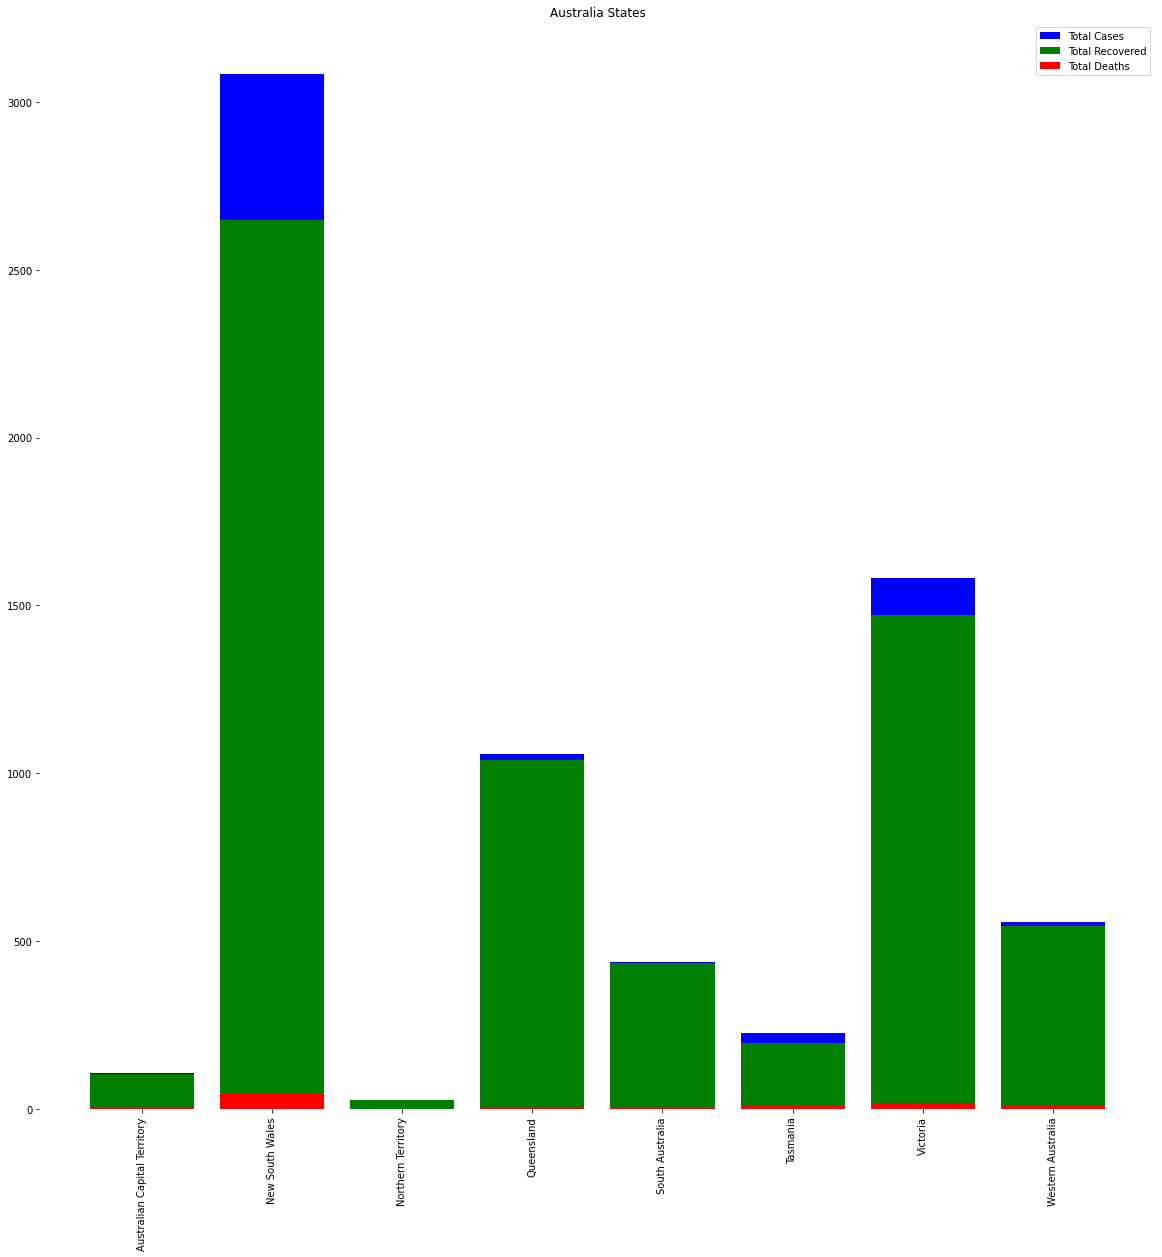

In [59]:
county1=australia_county['province_state']

confirmed1=australia_county['confirmed']
recovered1=australia_county['recovered']
deaths1=australia_county['deaths']
plt.figure(figsize=(20,20))
plt.bar(county1,confirmed1,linewidth=2,color='blue')
plt.bar(county1,recovered1,linewidth=2,color='green')
plt.bar(county1,deaths1,linewidth=2,color='red')

ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total Cases','Total Recovered','Total Deaths'],loc='best')
plt.title('Australia States')
plt.box(on=None)

Country wise States with most and least deaths recorded due to COVID-19

In [60]:
import folium

folium.Marker([42.1657,-74.9481], popup='<i>US Most Affected State New York</i>', icon=folium.Icon(icon='info-sign')).add_to(world)
folium.Marker([-14.2710,-170.1320], popup='<i>US Least Affected State American Samoa</i>', icon=folium.Icon(color='green')).add_to(world)
folium.Marker([52.9399,-73.5491], popup='<i>Canada Most Affected State Quebec</i>', icon=folium.Icon(color='red')).add_to(world)
folium.Marker([46.5653,-66.4619], popup='<i>Canada Least Affected State New Brunswick</i>', icon=folium.Icon(icon='cloud',color='orange')).add_to(world)
folium.Marker([30.9756,112.2707], popup='<i>China Most Affected State  Hubei</i>', icon=folium.Icon(color='purple')).add_to(world)
folium.Marker([32.9711,119.4550], popup='<i>China least Affected State Jiangsu </i>', icon=folium.Icon(icon='cloud',color='blue')).add_to(world)
folium.Marker([45.466794,9.190347], popup='<i>Italy Most Affected State Lombardia </i>', icon=folium.Icon(color='pink')).add_to(world)
folium.Marker([41.557748,14.659161], popup='<i>Italy least Affected State Molise </i>', icon=folium.Icon(icon='cloud',color='lightred')).add_to(world)
folium.Marker([49.372300,-2.364400], popup='<i>UK most Affected State Channel Islands </i>', icon=folium.Icon(color='lightblue')).add_to(world)
folium.Marker([18.220600,-63.068600], popup='<i>Uk least Affected State Anguilla </i>', icon=folium.Icon(icon='cloud',color='cadetblue')).add_to(world)
folium.Marker([48.7904,11.4979], popup='<i>Germany Most Affected State Bayern </i>', icon=folium.Icon(color='black')).add_to(world)
folium.Marker([0.0000,0.0000], popup='<i>Germany least Affected State</i>', icon=folium.Icon(icon='cloud',color='cadetblue')).add_to(world)
folium.Marker([-33.8688,151.2093], popup='<i>Australia Most Affected State New South Wales</i>', icon=folium.Icon(color='gray')).add_to(world)
folium.Marker([-12.4634,130.8456], popup='<i>Australia least Affected State Northern Territory </i>', icon=folium.Icon(icon='cloud',color='beige')).add_to(world)

world

In [61]:
us_county=us_county[us_county['people_tested']>0]
us_county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,-14.2710,-170.1320,0,0,0.0,0,60.0,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,36.1162,-119.6816,86167,3501,0.0,82666,6.0,218.076821,1380120.0,0.0,4.063040,84000006,USA,3492.893832,0.000000
6,Colorado,US,39.0598,-105.3111,22797,1299,3478.0,18020,8.0,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,41.5978,-72.7554,39017,3529,6264.0,29224,9.0,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,39.3185,-75.5071,8194,310,3965.0,3919,10.0,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976,0.000000
10,District of Columbia,US,38.8974,-77.0268,7551,407,1059.0,6085,11.0,1069.927127,40419.0,0.0,5.390015,84000011,USA,5727.106946,0.000000


In [62]:
us_county=us_county[us_county['deaths']>5]
us_county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
3,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,36.1162,-119.6816,86167,3501,0.0,82666,6.0,218.076821,1380120.0,0.0,4.063040,84000006,USA,3492.893832,0.000000
6,Colorado,US,39.0598,-105.3111,22797,1299,3478.0,18020,8.0,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,41.5978,-72.7554,39017,3529,6264.0,29224,9.0,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,39.3185,-75.5071,8194,310,3965.0,3919,10.0,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976,0.000000
10,District of Columbia,US,38.8974,-77.0268,7551,407,1059.0,6085,11.0,1069.927127,40419.0,0.0,5.390015,84000011,USA,5727.106946,0.000000
11,Florida,US,27.7663,-81.6868,47471,2096,0.0,45375,12.0,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911


In [63]:
us_county=us_county.reset_index()
us_county=us_county.drop(['index'],axis=1)
us_county

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,testing_rate,hospitalization_rate
0,Alabama,US,32.3182,-86.9023,13052,522,0.0,12530,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,61.3707,-152.4044,401,10,352.0,39,2.0,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,Arizona,US,33.7298,-111.4312,14906,747,3773.0,10386,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
3,Arkansas,US,34.9697,-92.3731,5003,107,3852.0,1044,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
4,California,US,36.1162,-119.6816,86167,3501,0.0,82666,6.0,218.076821,1380120.0,0.0,4.063040,84000006,USA,3492.893832,0.000000
5,Colorado,US,39.0598,-105.3111,22797,1299,3478.0,18020,8.0,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
6,Connecticut,US,41.5978,-72.7554,39017,3529,6264.0,29224,9.0,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
7,Delaware,US,39.3185,-75.5071,8194,310,3965.0,3919,10.0,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976,0.000000
8,District of Columbia,US,38.8974,-77.0268,7551,407,1059.0,6085,11.0,1069.927127,40419.0,0.0,5.390015,84000011,USA,5727.106946,0.000000
9,Florida,US,27.7663,-81.6868,47471,2096,0.0,45375,12.0,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911


Hospital Condition in US

In [64]:
beds=pd.read_csv('/kaggle/input/uncover/UNCOVER/harvard_global_health_institute/hospital-capacity-by-state-20-population-contracted.csv')
beds.fillna(0,inplace=True)
beds

,state,total_hospital_beds,total_icu_beds,hospital_bed_occupancy_rate,icu_bed_occupancy_rate,available_hospital_beds,potentially_available_hospital_beds,available_icu_beds,potentially_available_icu_beds,adult_population,...,percentage_of_potentially_available_icu_beds_needed_six_months,percentage_of_total_icu_beds_needed_six_months,icu_beds_needed_twelve_months,percentage_of_available_icu_beds_needed_twelve_months,percentage_of_potentially_available_icu_beds_needed_twelve_months,percentage_of_total_icu_beds_needed_twelve_months,icu_beds_needed_eighteen_months,percentage_of_available_icu_beds_needed_eighteen_months,percentage_of_potentially_available_icu_beds_needed_eighteen_months,percentage_of_total_icu_beds_needed_eighteen_months
0,AK,1583.0,130.0,0.66,0.58,533.0,1058.0,55.0,93.0,552319.0,...,3.34,2.39,155.0,2.82,1.67,1.19,101.0,1.84,1.09,0.78
1,AL,13959.0,1870.0,0.64,0.68,4994.0,9476.0,606.0,1238.0,3748089.0,...,1.83,1.21,1131.0,1.87,0.91,0.60,738.0,1.22,0.60,0.39
2,AR,8428.0,856.0,0.52,0.58,4069.0,6248.0,362.0,609.0,2272226.0,...,2.27,1.61,690.0,1.91,1.13,0.81,450.0,1.24,0.74,0.53
3,AZ,12868.0,1742.0,0.62,0.53,4938.0,8903.0,814.0,1278.0,5187520.0,...,2.47,1.82,1581.0,1.94,1.24,0.91,1031.0,1.27,0.81,0.59
4,CA,68554.0,8131.0,0.67,0.58,22831.0,45692.0,3381.0,5756.0,29868127.0,...,3.04,2.15,8737.0,2.58,1.52,1.07,5698.0,1.69,0.99,0.70
5,CO,9620.0,1264.0,0.58,0.60,4033.0,6826.0,500.0,882.0,4185186.0,...,2.77,1.93,1220.0,2.44,1.38,0.97,796.0,1.59,0.90,0.63
6,CT,6894.0,731.0,0.76,0.61,1643.0,4269.0,285.0,508.0,2831746.0,...,3.36,2.34,855.0,3.00,1.68,1.17,557.0,1.95,1.10,0.76
7,DC,2405.0,401.0,0.72,0.60,671.0,1538.0,159.0,280.0,554333.0,...,1.13,0.79,157.0,0.99,0.56,0.39,103.0,0.65,0.37,0.26
8,DE,1864.0,249.0,0.72,0.75,516.0,1190.0,63.0,156.0,739679.0,...,2.90,1.82,226.0,3.59,1.45,0.91,148.0,2.35,0.95,0.59
9,FL,51190.0,6226.0,0.66,0.67,17651.0,34421.0,2044.0,4135.0,16166865.0,...,2.45,1.63,5072.0,2.48,1.23,0.81,3308.0,1.62,0.80,0.53


In [65]:
us_beds=pd.merge(us_county,beds,how='right',left_index=True,right_index=True)

us_beds

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,...,percentage_of_potentially_available_icu_beds_needed_six_months,percentage_of_total_icu_beds_needed_six_months,icu_beds_needed_twelve_months,percentage_of_available_icu_beds_needed_twelve_months,percentage_of_potentially_available_icu_beds_needed_twelve_months,percentage_of_total_icu_beds_needed_twelve_months,icu_beds_needed_eighteen_months,percentage_of_available_icu_beds_needed_eighteen_months,percentage_of_potentially_available_icu_beds_needed_eighteen_months,percentage_of_total_icu_beds_needed_eighteen_months
0,Alabama,US,32.3182,-86.9023,13052.0,522.0,0.0,12530.0,1.0,266.194321,...,3.34,2.39,155.0,2.82,1.67,1.19,101.0,1.84,1.09,0.78
1,Alaska,US,61.3707,-152.4044,401.0,10.0,352.0,39.0,2.0,54.815493,...,1.83,1.21,1131.0,1.87,0.91,0.60,738.0,1.22,0.60,0.39
2,Arizona,US,33.7298,-111.4312,14906.0,747.0,3773.0,10386.0,4.0,204.788838,...,2.27,1.61,690.0,1.91,1.13,0.81,450.0,1.24,0.74,0.53
3,Arkansas,US,34.9697,-92.3731,5003.0,107.0,3852.0,1044.0,5.0,165.782801,...,2.47,1.82,1581.0,1.94,1.24,0.91,1031.0,1.27,0.81,0.59
4,California,US,36.1162,-119.6816,86167.0,3501.0,0.0,82666.0,6.0,218.076821,...,3.04,2.15,8737.0,2.58,1.52,1.07,5698.0,1.69,0.99,0.70
5,Colorado,US,39.0598,-105.3111,22797.0,1299.0,3478.0,18020.0,8.0,395.868121,...,2.77,1.93,1220.0,2.44,1.38,0.97,796.0,1.59,0.90,0.63
6,Connecticut,US,41.5978,-72.7554,39017.0,3529.0,6264.0,29224.0,9.0,1094.357902,...,3.36,2.34,855.0,3.00,1.68,1.17,557.0,1.95,1.10,0.76
7,Delaware,US,39.3185,-75.5071,8194.0,310.0,3965.0,3919.0,10.0,841.476990,...,1.13,0.79,157.0,0.99,0.56,0.39,103.0,0.65,0.37,0.26
8,District of Columbia,US,38.8974,-77.0268,7551.0,407.0,1059.0,6085.0,11.0,1069.927127,...,2.90,1.82,226.0,3.59,1.45,0.91,148.0,2.35,0.95,0.59
9,Florida,US,27.7663,-81.6868,47471.0,2096.0,0.0,45375.0,12.0,221.024217,...,2.45,1.63,5072.0,2.48,1.23,0.81,3308.0,1.62,0.80,0.53


In [66]:
us_beds=us_beds.drop(['uid','iso3'],axis=1)
us_beds

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,...,percentage_of_potentially_available_icu_beds_needed_six_months,percentage_of_total_icu_beds_needed_six_months,icu_beds_needed_twelve_months,percentage_of_available_icu_beds_needed_twelve_months,percentage_of_potentially_available_icu_beds_needed_twelve_months,percentage_of_total_icu_beds_needed_twelve_months,icu_beds_needed_eighteen_months,percentage_of_available_icu_beds_needed_eighteen_months,percentage_of_potentially_available_icu_beds_needed_eighteen_months,percentage_of_total_icu_beds_needed_eighteen_months
0,Alabama,US,32.3182,-86.9023,13052.0,522.0,0.0,12530.0,1.0,266.194321,...,3.34,2.39,155.0,2.82,1.67,1.19,101.0,1.84,1.09,0.78
1,Alaska,US,61.3707,-152.4044,401.0,10.0,352.0,39.0,2.0,54.815493,...,1.83,1.21,1131.0,1.87,0.91,0.60,738.0,1.22,0.60,0.39
2,Arizona,US,33.7298,-111.4312,14906.0,747.0,3773.0,10386.0,4.0,204.788838,...,2.27,1.61,690.0,1.91,1.13,0.81,450.0,1.24,0.74,0.53
3,Arkansas,US,34.9697,-92.3731,5003.0,107.0,3852.0,1044.0,5.0,165.782801,...,2.47,1.82,1581.0,1.94,1.24,0.91,1031.0,1.27,0.81,0.59
4,California,US,36.1162,-119.6816,86167.0,3501.0,0.0,82666.0,6.0,218.076821,...,3.04,2.15,8737.0,2.58,1.52,1.07,5698.0,1.69,0.99,0.70
5,Colorado,US,39.0598,-105.3111,22797.0,1299.0,3478.0,18020.0,8.0,395.868121,...,2.77,1.93,1220.0,2.44,1.38,0.97,796.0,1.59,0.90,0.63
6,Connecticut,US,41.5978,-72.7554,39017.0,3529.0,6264.0,29224.0,9.0,1094.357902,...,3.36,2.34,855.0,3.00,1.68,1.17,557.0,1.95,1.10,0.76
7,Delaware,US,39.3185,-75.5071,8194.0,310.0,3965.0,3919.0,10.0,841.476990,...,1.13,0.79,157.0,0.99,0.56,0.39,103.0,0.65,0.37,0.26
8,District of Columbia,US,38.8974,-77.0268,7551.0,407.0,1059.0,6085.0,11.0,1069.927127,...,2.90,1.82,226.0,3.59,1.45,0.91,148.0,2.35,0.95,0.59
9,Florida,US,27.7663,-81.6868,47471.0,2096.0,0.0,45375.0,12.0,221.024217,...,2.45,1.63,5072.0,2.48,1.23,0.81,3308.0,1.62,0.80,0.53


In [67]:
us_beds=us_beds.dropna()
us_beds

,province_state,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,...,percentage_of_potentially_available_icu_beds_needed_six_months,percentage_of_total_icu_beds_needed_six_months,icu_beds_needed_twelve_months,percentage_of_available_icu_beds_needed_twelve_months,percentage_of_potentially_available_icu_beds_needed_twelve_months,percentage_of_total_icu_beds_needed_twelve_months,icu_beds_needed_eighteen_months,percentage_of_available_icu_beds_needed_eighteen_months,percentage_of_potentially_available_icu_beds_needed_eighteen_months,percentage_of_total_icu_beds_needed_eighteen_months
0,Alabama,US,32.3182,-86.9023,13052.0,522.0,0.0,12530.0,1.0,266.194321,...,3.34,2.39,155.0,2.82,1.67,1.19,101.0,1.84,1.09,0.78
1,Alaska,US,61.3707,-152.4044,401.0,10.0,352.0,39.0,2.0,54.815493,...,1.83,1.21,1131.0,1.87,0.91,0.60,738.0,1.22,0.60,0.39
2,Arizona,US,33.7298,-111.4312,14906.0,747.0,3773.0,10386.0,4.0,204.788838,...,2.27,1.61,690.0,1.91,1.13,0.81,450.0,1.24,0.74,0.53
3,Arkansas,US,34.9697,-92.3731,5003.0,107.0,3852.0,1044.0,5.0,165.782801,...,2.47,1.82,1581.0,1.94,1.24,0.91,1031.0,1.27,0.81,0.59
4,California,US,36.1162,-119.6816,86167.0,3501.0,0.0,82666.0,6.0,218.076821,...,3.04,2.15,8737.0,2.58,1.52,1.07,5698.0,1.69,0.99,0.70
5,Colorado,US,39.0598,-105.3111,22797.0,1299.0,3478.0,18020.0,8.0,395.868121,...,2.77,1.93,1220.0,2.44,1.38,0.97,796.0,1.59,0.90,0.63
6,Connecticut,US,41.5978,-72.7554,39017.0,3529.0,6264.0,29224.0,9.0,1094.357902,...,3.36,2.34,855.0,3.00,1.68,1.17,557.0,1.95,1.10,0.76
7,Delaware,US,39.3185,-75.5071,8194.0,310.0,3965.0,3919.0,10.0,841.476990,...,1.13,0.79,157.0,0.99,0.56,0.39,103.0,0.65,0.37,0.26
8,District of Columbia,US,38.8974,-77.0268,7551.0,407.0,1059.0,6085.0,11.0,1069.927127,...,2.90,1.82,226.0,3.59,1.45,0.91,148.0,2.35,0.95,0.59
9,Florida,US,27.7663,-81.6868,47471.0,2096.0,0.0,45375.0,12.0,221.024217,...,2.45,1.63,5072.0,2.48,1.23,0.81,3308.0,1.62,0.80,0.53


In [68]:
us_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 53 columns):
province_state                                                         53 non-null object
country_region                                                         53 non-null object
lat                                                                    53 non-null float64
long                                                                   53 non-null float64
confirmed                                                              53 non-null float64
deaths                                                                 53 non-null float64
recovered                                                              53 non-null float64
active                                                                 53 non-null float64
fips                                                                   53 non-null float64
incident_rate                                                          53 non-nu

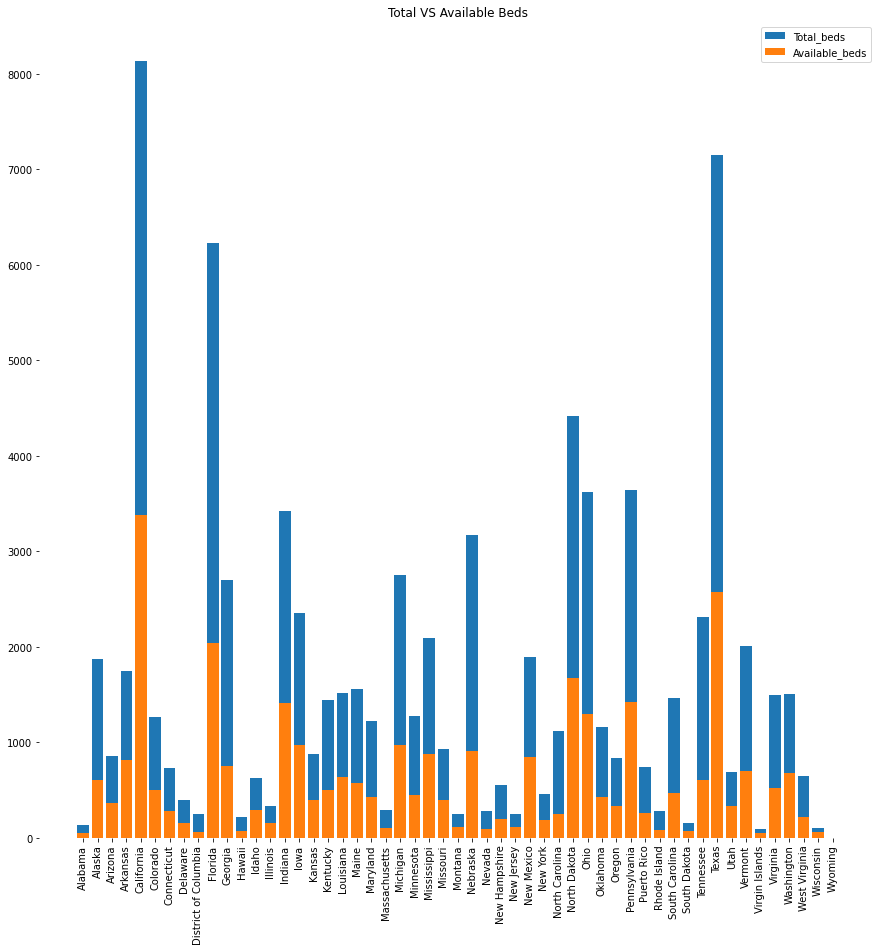

In [69]:
plt.figure(figsize=(15,15))
hos_beds=us_beds['total_icu_beds']
ava_beds=us_beds['available_icu_beds']
county=us_beds['province_state']
plt.bar(county,hos_beds,linewidth=2)
plt.bar(county,ava_beds,linewidth=2)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Total_beds','Available_beds'],loc='best')
plt.title('Total VS Available Beds')
plt.box(on=None)

In [70]:
US_beds=us_beds.set_index('province_state')
US_beds.head()

,country_region,lat,long,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,...,percentage_of_potentially_available_icu_beds_needed_six_months,percentage_of_total_icu_beds_needed_six_months,icu_beds_needed_twelve_months,percentage_of_available_icu_beds_needed_twelve_months,percentage_of_potentially_available_icu_beds_needed_twelve_months,percentage_of_total_icu_beds_needed_twelve_months,icu_beds_needed_eighteen_months,percentage_of_available_icu_beds_needed_eighteen_months,percentage_of_potentially_available_icu_beds_needed_eighteen_months,percentage_of_total_icu_beds_needed_eighteen_months
province_state,,,,,,,,,,,,,,,,,,,,,
Alabama,US,32.3182,-86.9023,13052.0,522.0,0.0,12530.0,1.0,266.194321,164450.0,...,3.34,2.39,155.0,2.82,1.67,1.19,101.0,1.84,1.09,0.78
Alaska,US,61.3707,-152.4044,401.0,10.0,352.0,39.0,2.0,54.815493,37045.0,...,1.83,1.21,1131.0,1.87,0.91,0.60,738.0,1.22,0.60,0.39
Arizona,US,33.7298,-111.4312,14906.0,747.0,3773.0,10386.0,4.0,204.788838,165435.0,...,2.27,1.61,690.0,1.91,1.13,0.81,450.0,1.24,0.74,0.53
Arkansas,US,34.9697,-92.3731,5003.0,107.0,3852.0,1044.0,5.0,165.782801,96258.0,...,2.47,1.82,1581.0,1.94,1.24,0.91,1031.0,1.27,0.81,0.59
California,US,36.1162,-119.6816,86167.0,3501.0,0.0,82666.0,6.0,218.076821,1380120.0,...,3.04,2.15,8737.0,2.58,1.52,1.07,5698.0,1.69,0.99,0.70


In [71]:
print('State with max cpacity of bed in hospitals is ',US_beds['total_icu_beds'].idxmax(),'with',int(US_beds['total_icu_beds'].max()),'beds')

State with max cpacity of bed in hospitals is  California with 8131 beds


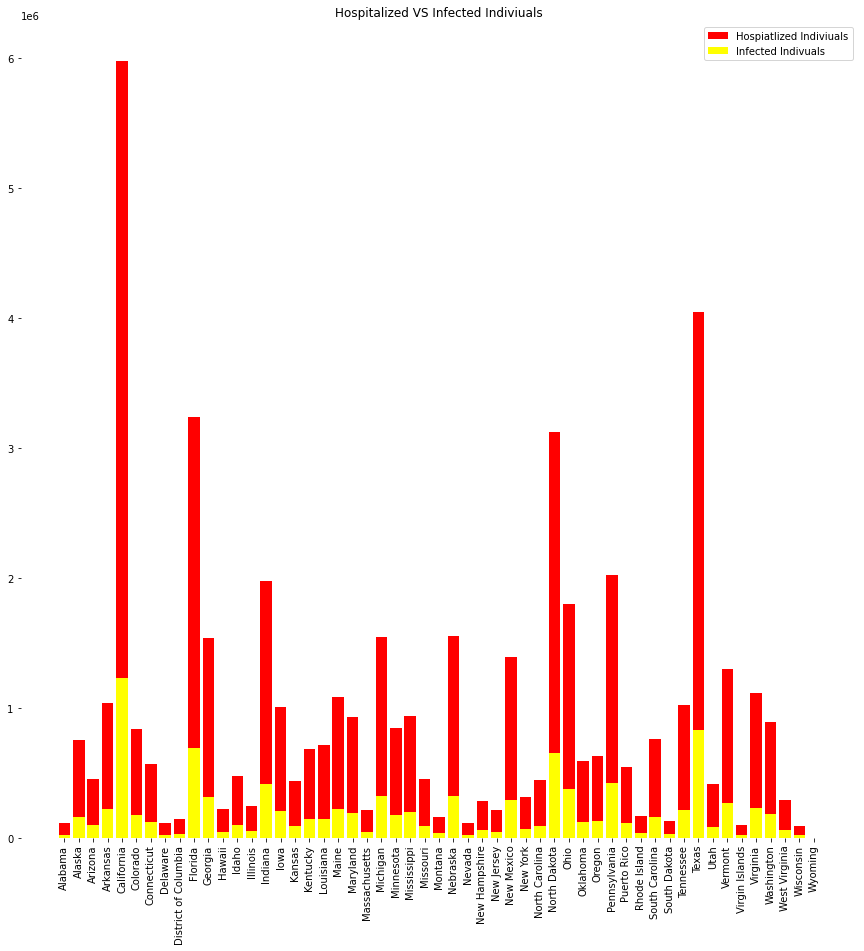

In [72]:
plt.figure(figsize=(15,15))
infected=us_beds['projected_infected_individuals']
hospitalized=us_beds['proejcted_hospitalized_individuals']
county=us_beds['province_state']
plt.bar(county,infected,linewidth=2,color='red')
plt.bar(county,hospitalized,linewidth=2,color='yellow')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Hospiatlized Indiviuals','Infected Indivuals'],loc='best')
plt.title('Hospitalized VS Infected Indiviuals')
plt.box(on=None)

In [73]:
print('State with max Infected Indiviuals ',US_beds['projected_infected_individuals'].idxmax(),'with count of',int(US_beds['projected_infected_individuals'].max()))

State with max Infected Indiviuals  California with count of 5973625


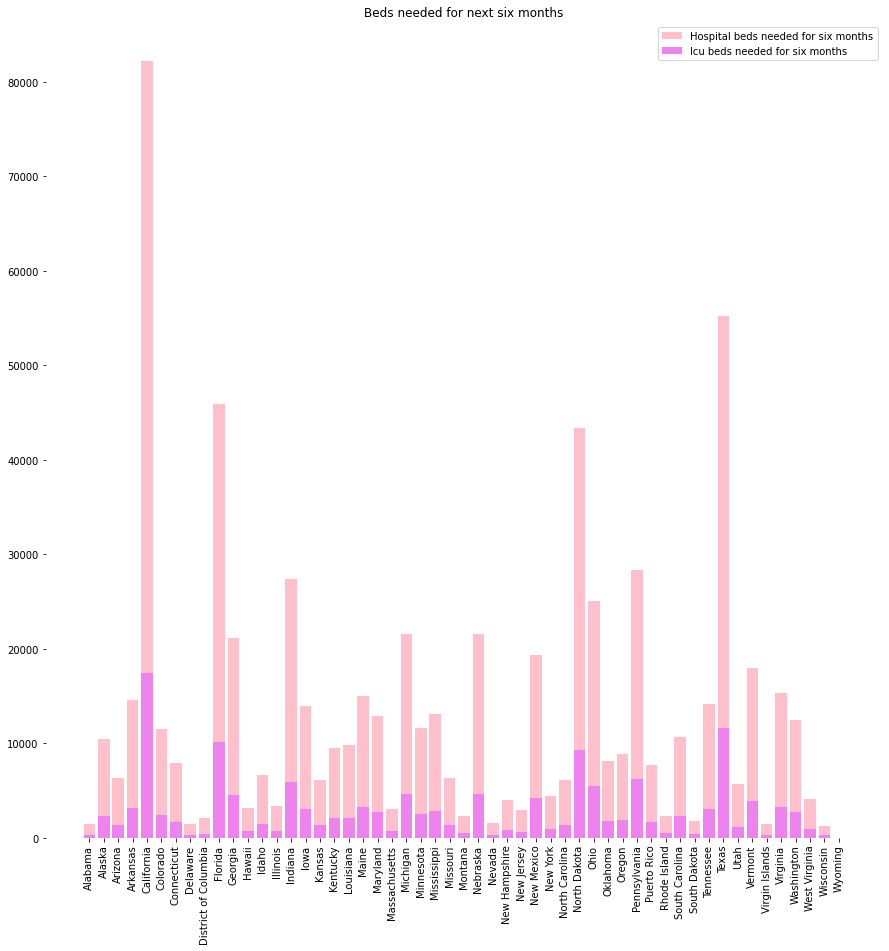

In [74]:
plt.figure(figsize=(15,15))
hos_need=us_beds['hospital_beds_needed_six_months']
icu_need=us_beds['icu_beds_needed_six_months']
county=us_beds['province_state']
plt.bar(county,hos_need,linewidth=2,color='pink')
plt.bar(county,icu_need,linewidth=2,color='violet')
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.legend(['Hospital beds needed for six months','Icu beds needed for six months'],loc='best')
plt.title('Beds needed for next six months')
plt.box(on=None)

In [75]:
print('State with max need of hosiptal beds for next six months is ',US_beds['hospital_beds_needed_six_months'].idxmax(),'with',int(US_beds['hospital_beds_needed_six_months'].max()),'beds')

State with max need of hosiptal beds for next six months is  California with 82187 beds
